In [1]:
from glob import glob

test_dir = '/home/abc/pzw/data/test/'
test_dir_set = glob(test_dir+'*')
print(test_dir_set)

['/home/abc/pzw/data/test/bar_data', '/home/abc/pzw/data/test/line_data', '/home/abc/pzw/data/test/UNKNOWN', '/home/abc/pzw/data/test/pie_data', '/home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART']


In [2]:
for t_dir in test_dir_set:
    img_set = glob(t_dir + '/*')
    print(t_dir,'--images numbers:',len(img_set),'\n')

/home/abc/pzw/data/test/bar_data --images numbers: 11832 

/home/abc/pzw/data/test/line_data --images numbers: 13704 

/home/abc/pzw/data/test/UNKNOWN --images numbers: 226 

/home/abc/pzw/data/test/pie_data --images numbers: 14914 

/home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART --images numbers: 509 



In [3]:
labels = ['0/', '1/', '20/', '30/', '40/', '50/', '60/', '70/']
classes=['UNKNOWN', 'LINE_CHART', 'AREA_CHART','BAR_CHART','COLUMN_CHART','PIE_CHART','GRID_TABLE','LINE_TABLE']

In [4]:
from keras.models import load_model

model = load_model('model200016100_01_p.h5')

Using TensorFlow backend.


## 混淆矩阵

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    import itertools
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", fontsize=16, color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [9]:
from PIL import Image


def predict_on_set(pie_set):
    y_pie_pred = []
    y_pie_prob = []

    for i, key in tqdm(enumerate(sorted(pie_set))):
#     print(key)
        img = Image.open(key).convert("RGB")
        img_arr = np.array(img.resize((299, 299))) / 255.
        y_pie_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
        y_pie_prob.append(y_pie_pred0[0])
        label_index = np.array(get_max_index(y_pie_pred0[0]))[0]
        y_pie_pred.append(classes[int(label_index)])
#     print(y_pie_pred)
    return y_pie_pred

In [18]:
import cv2


def predict_on_cvset(pie_set):
    y_pie_pred = []
    y_pie_prob = []

    for i, key in tqdm(enumerate(sorted(pie_set))):
#     print(key)
        img = cv2.imread(key)[:,:,::-1]
#         img = Image.open(key).convert("RGB")
#         img_arr = np.array(img.resize((299, 299))) / 255.
        img_arr = cv2.resize(img, (299, 299)) / 255.
        y_pie_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
        y_pie_prob.append(y_pie_pred0[0])
        label_index = np.array(get_max_index(y_pie_pred0[0]))[0]
        y_pie_pred.append(classes[int(label_index)])
#     print(y_pie_pred)
    return y_pie_pred

In [11]:
def get_max_index(a):
    index = []
    for i, key in enumerate(a):
        if key==max(a):
            index.append(i)
    return index

### predict bar_data

In [6]:
bar_set = glob(test_dir_set[0] + '/*')
print(len(bar_set))

11832


In [13]:
# get y_true
y_bar_true = ['BAR_CHART'] * 11832

In [12]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_bar_pred = predict_on_set(bar_set)

print('excute time:%s'%(time.clock()-start))

11832it [05:36, 35.12it/s]

excute time:353.387697


NameError: name 'y_bar_true' is not defined

[[   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [ 232  376  242 1361 9463    3  103   52]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


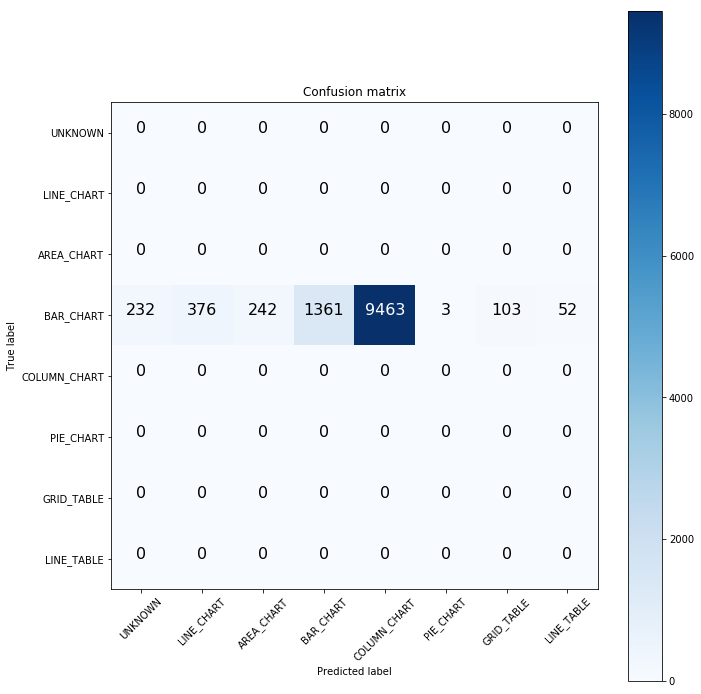

In [14]:
# bar数据的混淆矩阵
cm = confusion_matrix(y_bar_true, y_bar_pred, labels=classes)
plot_confusion_matrix(cm, classes)

### predict line_data

In [15]:
line_set = glob(test_dir_set[1] + '/*')
print(len(line_set))

13704


In [22]:
# get y_true
y_line_true = ['LINE_CHART'] * 13704

In [19]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_line_pred = predict_on_cvset(line_set)

print('excute time:%s'%(time.clock()-start))


0it [00:00, ?it/s]
1it [00:00,  3.19it/s]
5it [00:00, 11.65it/s]
9it [00:00, 16.44it/s]
13it [00:00, 19.10it/s]
17it [00:00, 21.41it/s]
21it [00:00, 23.22it/s]
25it [00:01, 24.70it/s]
29it [00:01, 25.18it/s]
33it [00:01, 26.03it/s]
37it [00:01, 26.44it/s]
41it [00:01, 26.45it/s]
44it [00:01, 26.40it/s]
48it [00:01, 26.85it/s]
52it [00:01, 27.45it/s]
56it [00:02, 27.83it/s]
60it [00:02, 28.27it/s]
64it [00:02, 28.67it/s]
68it [00:02, 29.06it/s]
72it [00:02, 29.33it/s]
76it [00:02, 29.51it/s]
80it [00:02, 29.84it/s]
84it [00:02, 30.06it/s]
88it [00:02, 30.31it/s]
92it [00:03, 30.54it/s]
96it [00:03, 30.78it/s]
100it [00:03, 31.02it/s]
104it [00:03, 31.20it/s]
108it [00:03, 31.23it/s]
112it [00:03, 31.36it/s]
116it [00:03, 31.47it/s]
120it [00:03, 31.63it/s]
124it [00:03, 31.79it/s]
128it [00:04, 31.94it/s]
132it [00:04, 32.04it/s]
136it [00:04, 32.15it/s]
140it [00:04, 32.19it/s]
144it [00:04, 32.20it/s]
148it [00:04, 32.27it/s]
152it [00:04, 32.34it/s]
156it [00:04, 32.43it/s]
160it [0

excute time:431.815571


ValueError: At least one label specified must be in y_true

[[    0     0     0     0     0     0     0     0]
 [  375 11945   612   126   362     2   221    61]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


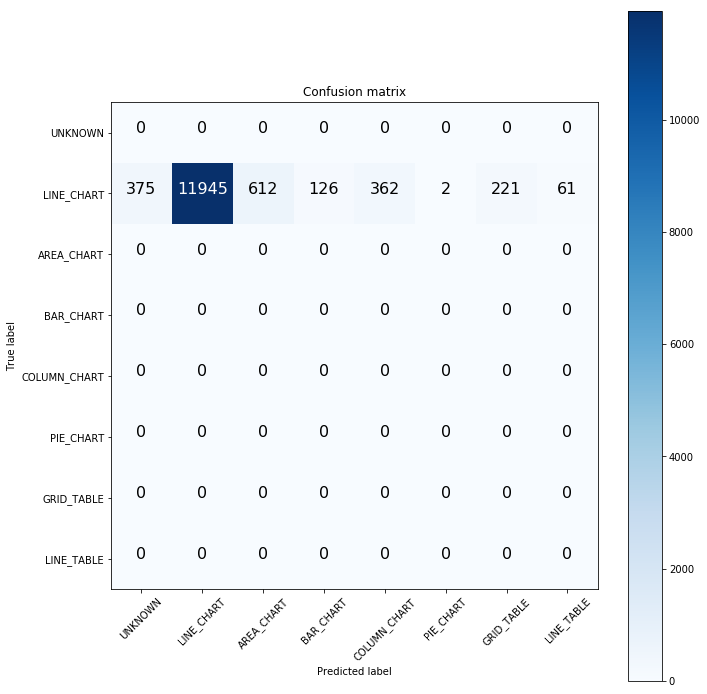

In [23]:
# Line数据的混淆矩阵
cm = confusion_matrix(y_line_true, y_line_pred, labels=classes)
plot_confusion_matrix(cm, classes)

### predict UNKNOWN

In [11]:
UNKNOWN_set = glob(test_dir_set[2] + '/*')
print(len(UNKNOWN_set))

226


In [152]:
# get y_true
y_unkn_true = ['UNKNOWN'] * 226
print(y_unkn_true)

['UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN'

In [15]:
from PIL import Image
import numpy as np

img = Image.open(UNKNOWN_set[0]).convert("RGB")
img_arr = np.array(img.resize((299, 299))) / 255.
y_unkn_pred = model.predict(np.expand_dims(img_arr, axis=0))
print(y_unkn_pred)

[[  9.99990463e-01   7.69627917e-08   7.33200295e-07   9.32389526e-07
    1.88391687e-06   2.89559398e-06   1.19059200e-06   1.73016304e-06]]


In [44]:
bin_y_unkn = y_unkn_pred>0.5
print(bin_y_unkn[0])

label_index = np.array(np.nonzero(np.array(bin_y_unkn[0])))
print(label_index[0])

labels = ['0/', '1/', '20/', '30/', '40/', '50/', '60/', '70/']
classes=['UNKNOWN', 'LINE_TABLE', 'AREA_ChART','BAR_CHART','COLUMN_CHART','PIE_CHART','GRID_TABLE','LINE_TABLE']

classes[label_index[0,0]]
# print(y_label)

[ True False False False False False False False]
[0]


'UNKNOWN'

In [131]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_unkn_pred = []

for i, key in tqdm(enumerate(sorted(UNKNOWN_set))):
    print(key)
    img = Image.open(key).convert("RGB")
    img_arr = np.array(img.resize((299, 299))) / 255.
    y_unkn_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
    bin_y_up = (y_unkn_pred0[0]>0.5).astype('int')
    print(bin_y_up,type(bin_y_up))
    label_index = np.array(np.nonzero(bin_y_up))[0]
    print(label_index,type(label_index))
    y_unkn_pred.append(classes[int(label_index)])
print(y_unkn_pred)
print('excute time:%s'%(time.clock()-start))

3it [00:00, 29.59it/s]

/home/abc/pzw/data/test/UNKNOWN/598d55c28b2a117c84fce092-1.png
[1 0 0 0 0 0 0 0] <class 'numpy.ndarray'>
[0] <class 'numpy.ndarray'>
/home/abc/pzw/data/test/UNKNOWN/598d6bcbcafd5b40edb1bdcc-1.jpg
[1 0 0 0 0 0 0 0] <class 'numpy.ndarray'>
[0] <class 'numpy.ndarray'>
/home/abc/pzw/data/test/UNKNOWN/598d96cfcafd5b40edb266f7-8.png
[1 0 0 0 0 0 0 0] <class 'numpy.ndarray'>
[0] <class 'numpy.ndarray'>
/home/abc/pzw/data/test/UNKNOWN/598de46dcafd5b40edb3219e-4.png
[1 0 0 0 0 0 0 0] <class 'numpy.ndarray'>
[0] <class 'numpy.ndarray'>
/home/abc/pzw/data/test/UNKNOWN/598deff0cafd5b40edb33d70-1.png
[1 0 0 0 0 0 0 0] <class 'numpy.ndarray'>
[0] <class 'numpy.ndarray'>
/home/abc/pzw/data/test/UNKNOWN/598df4898b2a116d7517b7e5-5.png
[1 0 0 0 0 0 0 0] <class 'numpy.ndarray'>
[0] <class 'numpy.ndarray'>
/home/abc/pzw/data/test/UNKNOWN/598dfb998b2a116d7517c170-30.png
[0 0 0 0 0 0 0 0] <class 'numpy.ndarray'>
[] <class 'numpy.ndarray'>


TypeError: only length-1 arrays can be converted to Python scalars

In [130]:
sorted(UNKNOWN_set)[6]

'/home/abc/pzw/data/test/UNKNOWN/598dfb998b2a116d7517c170-30.png'

In [129]:
from PIL import Image
import numpy as np

img = Image.open(sorted(UNKNOWN_set)[6]).convert("RGB")
img_arr = np.array(img.resize((299, 299))) / 255.
y_unkn_pred = model.predict(np.expand_dims(img_arr, axis=0))
print(y_unkn_pred)

[[  1.25751764e-01   4.52024192e-01   6.00499217e-04   6.01781903e-05
    4.15312916e-01   9.61234309e-06   4.78112511e-03   1.45963824e-03]]


In [132]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_unkn_pred = []
y_unkn_prob = []

for i, key in tqdm(enumerate(sorted(UNKNOWN_set))):
#     print(key)
    img = Image.open(key).convert("RGB")
    img_arr = np.array(img.resize((299, 299))) / 255.
    y_unkn_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
    y_unkn_prob.append(y_unkn_pred0[0])
    if y_unkn_pred0[0,0]>0.5:
        bin_y_up = (y_unkn_pred0[0]>0.5).astype('int')
#         print(bin_y_up,type(bin_y_up))
        label_index = np.array(np.nonzero(bin_y_up))[0]
#         print(label_index,type(label_index))
        y_unkn_pred.append(classes[int(label_index)])
    else:
        y_unkn_pred.append(classes[0])
        print('false unknown images:', key)
print(y_unkn_pred)
print('excute time:%s'%(time.clock()-start))

12it [00:00, 37.09it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/598dfb998b2a116d7517c170-30.png


28it [00:00, 35.58it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/5992eecacafd5b3d9315e8b6-10.png
false unknown images: /home/abc/pzw/data/test/UNKNOWN/59930601cafd5b3d931602b6-11.png


45it [00:01, 35.25it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/599d9535cafd5b2f0865f9ef-2.png


53it [00:01, 34.49it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/59bf07d92af4843ca3983e39-3.png


106it [00:02, 36.38it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/59dd2eb9077a8b4b1290497c-5.png


130it [00:03, 36.17it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/59e0c62d8b2a110e3e65fa04-1.png


142it [00:03, 36.24it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/59e11b81cafd5b28920bf9e4-3.jpg


150it [00:04, 36.17it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/59e3b81e077a8b4b12974c55-10.png


163it [00:04, 36.37it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/59e45b49077a8b4b129862c5-80.png


191it [00:05, 36.43it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/59e8cc9c2af4842e3fec0833-3.png


212it [00:05, 36.28it/s]

false unknown images: /home/abc/pzw/data/test/UNKNOWN/59fc0ad22af4845146672b7a-7.png
false unknown images: /home/abc/pzw/data/test/UNKNOWN/59fce381cafd5b34f91ca3a6-3.png


226it [00:06, 36.35it/s]

['UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN'

In [138]:
a = np.random.randint(5,size=10)
a

array([4, 4, 3, 2, 2, 4, 0, 3, 1, 4])

In [141]:
def get_max_index(a):
    index = []
    for i, key in enumerate(a):
        if key==max(a):
            index.append(i)
    return index

In [142]:
index = get_max_index(a)
index

[0, 1, 5, 9]

In [143]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_unkn_pred = []
y_unkn_prob = []

for i, key in tqdm(enumerate(sorted(UNKNOWN_set))):
#     print(key)
    img = Image.open(key).convert("RGB")
    img_arr = np.array(img.resize((299, 299))) / 255.
    y_unkn_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
    y_unkn_prob.append(y_unkn_pred0[0])
    label_index = np.array(get_max_index(y_unkn_pred0[0]))[0]
    y_unkn_pred.append(classes[int(label_index)])
    if y_unkn_pred0[0,0]<0.5:
        print('false unknown images:', i, key, y_unkn_pred0[0])
print(y_unkn_pred)
print('excute time:%s'%(time.clock()-start))

12it [00:00, 36.80it/s]

false unknown images: 6 /home/abc/pzw/data/test/UNKNOWN/598dfb998b2a116d7517c170-30.png [  1.25751764e-01   4.52024192e-01   6.00499217e-04   6.01781903e-05
   4.15312916e-01   9.61234309e-06   4.78112511e-03   1.45963824e-03]


28it [00:00, 36.66it/s]

false unknown images: 23 /home/abc/pzw/data/test/UNKNOWN/5992eecacafd5b3d9315e8b6-10.png [  2.03402690e-03   9.96511757e-01   1.63644982e-05   8.76412741e-05
   9.03896405e-04   5.70500625e-08   3.04975729e-05   4.15781426e-04]
false unknown images: 24 /home/abc/pzw/data/test/UNKNOWN/59930601cafd5b3d931602b6-11.png [  5.70915648e-10   9.99999523e-01   3.97861549e-10   3.71331765e-07
   9.43355900e-08   6.29321484e-10   2.63452263e-11   8.82785756e-09]


45it [00:01, 36.40it/s]

false unknown images: 39 /home/abc/pzw/data/test/UNKNOWN/599d9535cafd5b2f0865f9ef-2.png [  3.64469022e-01   5.52942991e-01   7.56987629e-06   8.23814198e-02
   9.98894939e-06   1.42109897e-07   1.82937176e-04   5.95408619e-06]


53it [00:01, 36.32it/s]

false unknown images: 49 /home/abc/pzw/data/test/UNKNOWN/59bf07d92af4843ca3983e39-3.png [  5.52166067e-03   9.94471669e-01   1.18024175e-07   1.72447164e-06
   3.36000835e-06   5.74694809e-07   1.06485111e-07   7.37068206e-07]


106it [00:02, 37.95it/s]

false unknown images: 101 /home/abc/pzw/data/test/UNKNOWN/59dd2eb9077a8b4b1290497c-5.png [  2.58304149e-01   7.41475940e-01   6.41028635e-08   5.99869873e-06
   7.16475552e-06   2.97124507e-06   1.10241286e-04   9.34532145e-05]


130it [00:03, 37.64it/s]

false unknown images: 125 /home/abc/pzw/data/test/UNKNOWN/59e0c62d8b2a110e3e65fa04-1.png [  1.51135018e-02   9.60391387e-03   3.12688737e-03   2.26270426e-02
   3.76554996e-01   1.79978251e-05   3.60975504e-01   2.11980268e-01]


142it [00:03, 37.51it/s]

false unknown images: 136 /home/abc/pzw/data/test/UNKNOWN/59e11b81cafd5b28920bf9e4-3.jpg [  2.46444225e-01   3.10586640e-10   1.08424729e-07   7.53522635e-01
   1.62737013e-09   3.41333042e-08   2.39953970e-05   9.06283822e-06]


150it [00:04, 37.12it/s]

false unknown images: 145 /home/abc/pzw/data/test/UNKNOWN/59e3b81e077a8b4b12974c55-10.png [  1.01766977e-02   9.89813983e-01   1.83048687e-08   1.86135674e-06
   3.67020084e-06   2.13349631e-06   5.32395291e-07   1.12970656e-06]


163it [00:04, 37.23it/s]

false unknown images: 158 /home/abc/pzw/data/test/UNKNOWN/59e45b49077a8b4b129862c5-80.png [  2.61377636e-02   2.40127207e-07   4.86554472e-06   9.71567035e-01
   3.29463765e-05   2.12534703e-03   9.13252006e-05   4.04328202e-05]


189it [00:05, 37.19it/s]

false unknown images: 185 /home/abc/pzw/data/test/UNKNOWN/59e8cc9c2af4842e3fec0833-3.png [  2.69562334e-01   5.51487901e-04   3.81692797e-02   7.78173059e-02
   8.01109127e-05   6.11604929e-01   1.24620099e-03   9.68328619e-04]


210it [00:05, 36.86it/s]

false unknown images: 205 /home/abc/pzw/data/test/UNKNOWN/59fc0ad22af4845146672b7a-7.png [  5.05527851e-08   9.99993682e-01   5.43897841e-06   3.06679141e-07
   8.45623447e-08   4.50963256e-07   1.87442797e-10   2.39754083e-09]
false unknown images: 212 /home/abc/pzw/data/test/UNKNOWN/59fce381cafd5b34f91ca3a6-3.png [  5.52166067e-03   9.94471669e-01   1.18024175e-07   1.72447164e-06
   3.36000835e-06   5.74694809e-07   1.06485111e-07   7.37068206e-07]


226it [00:06, 36.97it/s]

['UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'LINE_TABLE', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'LINE_TABLE', 'LINE_TABLE', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'LINE_TABLE', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'LINE_TABLE', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKN

[[226]]


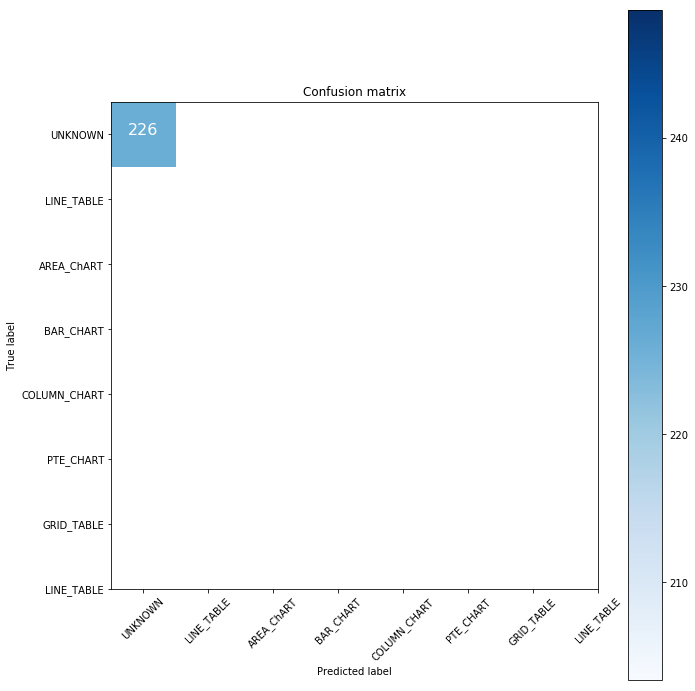

In [149]:
# 原始数据的混淆矩阵
cm = confusion_matrix(y_unkn_true, y_unkn_true)
plot_confusion_matrix(cm, classes)

In [157]:
print(classes,'\n'*2,y_unkn_true, '\n'*2, y_unkn_pred)

['UNKNOWN', 'LINE_TABLE', 'AREA_ChART', 'BAR_CHART', 'COLUMN_CHART', 'PTE_CHART', 'GRID_TABLE', 'LINE_TABLE'] 

 ['UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'UNKNO

[[213   0   0   2   1   1   0   9]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


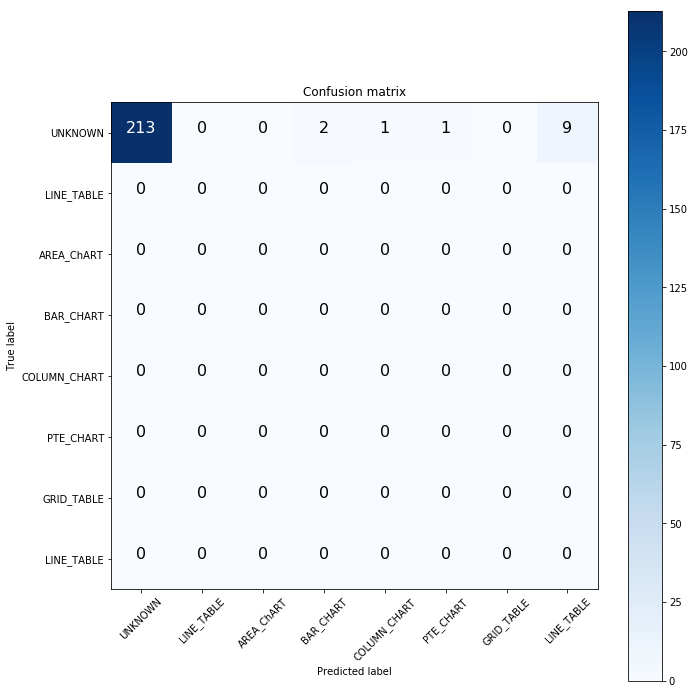

In [159]:
# UNKNOWN数据的混淆矩阵
cm2 = confusion_matrix(y_unkn_true, y_unkn_pred, labels=classes)
plot_confusion_matrix(cm2, classes)

### predict pie_data

In [13]:
pie_set = glob(test_dir_set[3] + '/*')
print(len(pie_set))

14914


In [166]:
# get y_true
y_pie_true = ['PIE_CHART'] * 14914
# print(y_lcc_true)

In [170]:
def predict_on_set(pie_set):
    y_pie_pred = []
    y_pie_prob = []

    for i, key in tqdm(enumerate(sorted(pie_set))):
#     print(key)
        img = Image.open(key).convert("RGB")
        img_arr = np.array(img.resize((299, 299))) / 255.
        y_pie_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
        y_pie_prob.append(y_pie_pred0[0])
        label_index = np.array(get_max_index(y_pie_pred0[0]))[0]
        y_pie_pred.append(classes[int(label_index)])
#     print(y_pie_pred)
    return y_pie_pred

In [171]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_pie_pred = predict_on_set(pie_set)

print('excute time:%s'%(time.clock()-start))

14914it [07:02, 35.30it/s]

excute time:440.88160700000003


[[    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [  353   136    27   111   273 13981    16    17]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


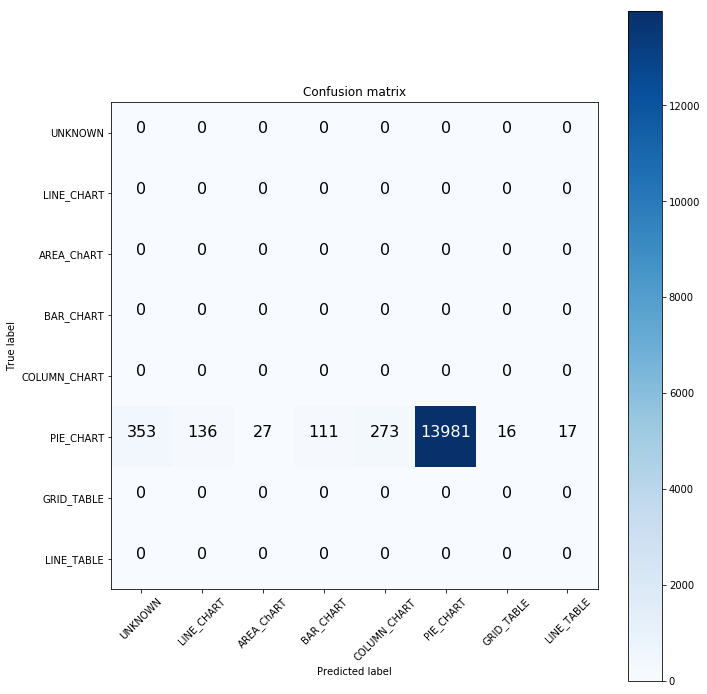

In [172]:
# UNKNOWN数据的混淆矩阵
cm = confusion_matrix(y_pie_true, y_pie_pred, labels=classes)
plot_confusion_matrix(cm, classes)

### predict line_column_combine 组合图预测类别

In [160]:
line_column_set = glob(test_dir_set[4] + '/*')
print(len(line_column_set))

509


In [162]:
# get y_true
y_lcc_true = ['COLUMN_CHART'] * 509
# print(y_lcc_true)

In [163]:
from tqdm import tqdm
from PIL import Image
import numpy as np
import time

start = time.clock()

y_lcc_pred = []
y_lcc_prob = []

for i, key in tqdm(enumerate(sorted(line_column_set))):
#     print(key)
    img = Image.open(key).convert("RGB")
    img_arr = np.array(img.resize((299, 299))) / 255.
    y_lcc_pred0 = model.predict(np.expand_dims(img_arr, axis=0))
    y_lcc_prob.append(y_lcc_pred0[0])
    label_index = np.array(get_max_index(y_lcc_pred0[0]))[0]
    y_lcc_pred.append(classes[int(label_index)])
    if y_lcc_pred0[0,0]<0.5:
        print('false unknown images:', i, key, y_lcc_pred0[0])
print(y_lcc_pred)
print('excute time:%s'%(time.clock()-start))

4it [00:00, 14.68it/s]

false unknown images: 0 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aaf8aecafd5b740c55dcaa_51_0.png [  1.09602405e-09   9.99995947e-01   1.19339268e-06   2.00210866e-06
   6.03386695e-07   2.59278732e-08   4.30283187e-09   2.03401456e-07]
false unknown images: 1 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aaf977cafd5b740c55fe05_75_0.png [  3.47177568e-03   1.28903761e-04   5.17399826e-07   2.19068966e-07
   9.96386647e-01   1.91253366e-06   6.36381685e-07   9.49389141e-06]
false unknown images: 2 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aaf993cafd5b740c560298_66_0.png [  5.81611600e-03   2.53148843e-04   6.17425894e-06   2.72355738e-08
   9.93029535e-01   1.10363104e-07   7.42109085e-04   1.52831213e-04]
false unknown images: 3 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aaf99ccafd5b740c56053b_14_0.png [  3.91997211e-02   1.07829215e-03   1.68830957e-05   1.08903572e-04
   9.58086610e-01   1.91046820e-06   1.50546432e-03   2.12964756e-06]


6it [00:00, 14.51it/s]

false unknown images: 4 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafa0ccafd5b740c561c00_6_0.png [  5.08543337e-04   1.34275667e-02   1.90948751e-02   3.71768983e-04
   7.25351155e-01   1.08567883e-06   2.41149291e-01   9.57023512e-05]
false unknown images: 5 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafa0ccafd5b740c561c00_8_0.png [  2.01457227e-03   1.11101875e-02   6.88311458e-03   7.61689385e-04
   2.13667918e-02   4.77762524e-06   9.57624316e-01   2.34623454e-04]
false unknown images: 6 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafa19cafd5b740c562016_102_1.png [  5.98135674e-21   2.47002419e-08   1.28952280e-08   3.52929963e-10
   1.00000000e+00   6.58896104e-10   1.12853815e-09   5.88238569e-09]
false unknown images: 7 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafa77cafd5b740c5637bd_107_0.png [  5.65373749e-02   2.11967454e-05   1.14696973e-03   8.85403861e-05
   6.90089464e-01   1.78252577e-07   2.52089828e-01   2.64241626e-05]


12it [00:00, 17.92it/s]

false unknown images: 8 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafa77cafd5b740c5637bd_108_0.png [  4.29519527e-02   1.19382739e-05   2.77414406e-03   7.27615989e-05
   7.33823776e-01   1.41765909e-07   2.20298544e-01   6.67363784e-05]
false unknown images: 9 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafa77cafd5b740c5637bd_133_0.png [  1.26359431e-04   3.24562155e-02   6.73346594e-03   6.38474536e-04
   9.59791541e-01   9.61316076e-08   2.51052843e-04   2.67569521e-06]
false unknown images: 10 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafa93cafd5b740c564067_42_0.png [  2.06536906e-11   4.45311287e-07   1.95475387e-08   1.01189634e-09
   9.99999404e-01   4.40878306e-10   4.11744452e-08   8.88968756e-08]
false unknown images: 11 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafa93cafd5b740c564067_45_0.png [  1.13457280e-12   2.37860931e-07   5.49478543e-08   1.74571468e-09
   9.99999642e-01   1.99186712e-09   3.05623864e-08   8.95052921e-08]
false unknown im

20it [00:00, 21.78it/s]

false unknown images: 14 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafac8cafd5b740c5651b8_62_0.png [  9.00891393e-07   9.99973059e-01   1.02195985e-08   9.08196611e-08
   1.62893045e-07   5.36220401e-10   2.52729569e-05   4.55295549e-07]
false unknown images: 15 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafad5cafd5b740c56561b_115_0.png [  7.64274657e-13   9.99999881e-01   3.03070041e-10   1.71408165e-11
   8.01723914e-08   2.12243160e-13   2.45479942e-10   8.22316035e-11]
false unknown images: 16 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafb1ccafd5b740c5666aa_49_0.png [  7.40137606e-13   9.99997854e-01   1.05216653e-08   1.14307579e-06
   8.97927862e-07   4.80058271e-10   1.93286187e-08   2.20656418e-08]
false unknown images: 17 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafb43cafd5b740c566ce5_67_1.png [  4.49606823e-03   2.13953062e-05   9.71624535e-03   2.51766414e-06
   4.01349217e-02   2.57166648e-05   9.40569878e-01   5.03324205e-03]
false unknown i

28it [00:01, 24.40it/s]

false unknown images: 21 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafd99cafd5b740c56bf34_55_0.png [  3.26934154e-04   5.56717441e-06   1.43971947e-05   1.79679560e-07
   9.99587476e-01   4.69203565e-09   5.77483734e-05   7.68747213e-06]
false unknown images: 22 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafd9ecafd5b740c56c001_50_0.png [  3.08795914e-12   2.69306440e-07   4.15707930e-08   2.93020580e-10
   9.99998808e-01   5.67341674e-10   3.83018346e-07   3.99540568e-07]
false unknown images: 23 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafdffcafd5b740c56d52c_77_0.png [  3.58763577e-06   1.01021560e-05   3.42417252e-03   2.29151258e-08
   9.83253345e-02   2.03710982e-07   8.64477813e-01   3.37587595e-02]
false unknown images: 24 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafdffcafd5b740c56d547_64_0.png [  1.06557457e-06   1.47528825e-08   8.90515750e-08   4.72852557e-09
   9.99998689e-01   1.92825245e-09   5.65374023e-08   7.05892376e-08]
false unknown im

32it [00:01, 25.40it/s]

false unknown images: 28 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafe36cafd5b740c56e464_61_0.png [  1.33264019e-13   2.55490846e-07   2.59868536e-08   3.62894099e-07
   9.99998331e-01   1.90362903e-09   1.14797125e-07   9.39365577e-07]
false unknown images: 29 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aafed3cafd5b740c5709ee_69_0.png [  6.71477101e-05   4.30779750e-07   6.67757183e-09   1.60970615e-09
   9.99932408e-01   1.00051594e-08   8.41579340e-09   4.86335630e-08]
false unknown images: 30 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aaffc4cafd5b740c5746e5_57_0.png [  1.28338160e-03   2.65884933e-06   3.40785760e-07   1.40220251e-07
   9.98420835e-01   2.78796364e-07   7.09441792e-06   2.85353308e-04]
false unknown images: 31 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58ab000dcafd5b740c575904_71_1.png [  9.16864848e-12   4.78300601e-01   2.24102896e-05   1.09243160e-03
   5.20562708e-01   1.09827181e-06   7.65242112e-06   1.30810595e-05]
false unknown im

43it [00:01, 26.00it/s]

false unknown images: 36 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58ab01bdcafd5b740c57b376_6_0.png [  4.68136109e-02   9.28408682e-01   7.45172019e-06   5.68633259e-05
   1.84913442e-04   5.31010755e-06   1.22158055e-03   2.33016256e-02]
false unknown images: 37 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58aba468cafd5b740c60639c_38_3.png [  8.39767009e-02   1.09615949e-05   5.03922347e-05   7.33585921e-07
   9.15958285e-01   3.94081667e-07   1.01509124e-06   1.54916722e-06]
false unknown images: 38 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58abb034cafd5b740c60e4cc_49_0.png [  1.67332144e-06   4.73556295e-02   1.26053292e-05   2.21023626e-08
   9.52622056e-01   1.37982559e-09   7.89228307e-06   4.97751032e-08]
false unknown images: 39 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0143d581e3046a79fa216_3_0.png [  1.91093197e-10   9.99885321e-01   1.46187631e-05   5.88988369e-09
   3.86966718e-07   1.48865897e-09   9.40831960e-05   5.56485656e-06]
false unknown imag

51it [00:01, 27.23it/s]

false unknown images: 43 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b016e5581e3046a79fe362_4_0.png [  1.57550584e-10   9.99999285e-01   7.70086483e-09   8.58042739e-08
   4.54817979e-07   9.60386718e-12   3.85254815e-08   7.76759066e-08]
false unknown images: 44 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b016fa581e3046a79fe541_4_0.png [  5.53041522e-04   9.13048744e-01   1.44447426e-06   2.94731336e-07
   1.31308152e-05   1.18910801e-08   8.63200426e-02   6.33114687e-05]
false unknown images: 45 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b016fa581e3046a79fe544_3_0.png [  4.77939572e-08   9.99672532e-01   3.82842416e-08   1.23595996e-07
   2.19943555e-04   1.19064862e-11   1.07379979e-04   6.78164085e-08]
false unknown images: 46 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b016fa581e3046a79fe54a_3_0.png [  8.55240878e-10   9.99754727e-01   1.07970699e-07   2.65946142e-07
   1.91286861e-04   5.98864083e-11   5.35773470e-05   1.60305156e-08]
false unknown images

59it [00:02, 28.18it/s]

false unknown images: 51 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01738581e3046a79feb73_3_0.png [  1.53430235e-09   9.99998927e-01   1.24308315e-08   1.01809576e-07
   8.95244852e-07   3.21863612e-11   1.94700576e-08   8.90636542e-08]
false unknown images: 52 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0174b581e3046a79fece3_3_0.png [  3.69068576e-09   9.99996424e-01   1.87864238e-10   6.48009868e-09
   9.00996611e-07   6.31071324e-12   2.67897053e-06   1.96331218e-08]
false unknown images: 53 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0174c581e3046a79fed09_4_0.png [  3.00053991e-08   9.99564707e-01   5.74076289e-08   1.55331694e-08
   3.28354072e-04   1.16487833e-10   1.06713553e-04   5.68066021e-08]
false unknown images: 54 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0174c581e3046a79fed22_3_0.png [  2.35989255e-08   9.99956608e-01   2.33726505e-09   3.74945195e-08
   1.12252801e-05   3.98329460e-11   3.21113330e-05   1.81132958e-08]
false unknown images

63it [00:02, 28.47it/s]

false unknown images: 59 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0177d581e3046a79ff0fd_4_0.png [  1.58826777e-04   9.99825060e-01   1.52363441e-07   3.10531163e-06
   4.97758811e-06   2.06979711e-10   5.97872440e-06   1.94269296e-06]
false unknown images: 60 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0177d581e3046a79ff112_2_0.png [  5.96115726e-08   9.99761522e-01   1.08677944e-09   4.50857879e-10
   5.57994099e-07   2.09704268e-11   2.36909400e-04   9.22777247e-07]
false unknown images: 61 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01783581e3046a79ff184_3_0.png [  1.34204578e-10   9.99999404e-01   4.08541601e-09   7.75490161e-09
   6.11434459e-08   1.65271911e-11   5.04555658e-07   9.76996173e-09]
false unknown images: 62 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01783581e3046a79ff18b_3_0.png [  8.78683758e-12   9.99997497e-01   4.77441801e-11   8.75024844e-11
   3.92128676e-08   2.12938472e-13   2.47925527e-06   4.69137351e-09]
false unknown images

71it [00:02, 28.85it/s]

false unknown images: 66 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b017bb581e3046a79ff598_4_0.png [  3.49204085e-04   9.99645948e-01   1.70980397e-09   2.47785874e-06
   8.46097308e-08   8.16651080e-10   1.93007327e-06   4.10356677e-07]
false unknown images: 67 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b017bb581e3046a79ff5ba_4_0.png [  8.83830165e-09   9.99999285e-01   1.83329307e-09   4.54860071e-07
   1.60900498e-07   1.02279490e-10   7.16180359e-09   6.60922694e-08]
false unknown images: 68 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b017c7581e3046a79ff68c_3_0.png [  4.71049987e-07   9.99998689e-01   3.06463271e-10   7.21127549e-07
   8.70608972e-08   4.95694111e-11   1.22887700e-08   2.76150018e-08]
false unknown images: 69 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b017c7581e3046a79ff694_3_0.png [  3.74264288e-04   9.99468386e-01   2.78189525e-08   9.15919216e-08
   2.58445721e-06   1.96379490e-09   1.54108508e-04   5.72138447e-07]
false unknown images

79it [00:02, 29.41it/s]

false unknown images: 73 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b017f8581e3046a79ffa83_4_0.png [  6.20815044e-08   9.99876380e-01   4.87012652e-09   9.00732022e-09
   9.96223662e-06   3.69498598e-11   1.12774964e-04   8.05771833e-07]
false unknown images: 74 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01804581e3046a79ffb64_3_0.png [  4.34431513e-06   7.13151574e-01   2.06589379e-04   3.22779260e-06
   2.67797053e-01   1.91994562e-08   1.86518840e-02   1.85332887e-04]
false unknown images: 75 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01804581e3046a79ffb71_3_0.png [  3.68119824e-09   9.99999285e-01   3.71414462e-11   1.09185239e-09
   1.89222131e-08   2.12951553e-12   6.98584699e-07   2.79391514e-08]
false unknown images: 76 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0180d581e3046a79ffc4f_5_0.png [  1.51018240e-03   9.98086929e-01   7.79954973e-07   2.44178809e-04
   1.12297348e-04   1.10552740e-08   3.01654472e-05   1.54497320e-05]
false unknown images

87it [00:02, 29.78it/s]

false unknown images: 80 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01821581e3046a79ffe06_3_0.png [  2.71956191e-09   9.99996662e-01   4.73689976e-10   2.32106014e-08
   3.06355719e-06   3.87874932e-12   2.18168765e-07   1.00046185e-08]
false unknown images: 81 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01828581e3046a79ffeba_3_1.png [  1.10087647e-04   9.99401569e-01   8.74747911e-07   4.84722783e-04
   1.50721576e-06   3.07129433e-08   3.11433467e-07   8.39755614e-07]
false unknown images: 82 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01835581e3046a7a0007f_3_0.png [  1.90546326e-02   3.48156225e-03   9.75948036e-01   3.72965178e-06
   1.91701518e-04   1.27575686e-03   2.71650079e-05   1.74320066e-05]
false unknown images: 83 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01839581e3046a7a000b2_4_0.png [  1.35998867e-04   9.99859333e-01   7.85171679e-08   2.98211990e-06
   3.59133935e-07   6.89309498e-10   3.74327641e-07   8.60104649e-07]
false unknown images

95it [00:03, 30.08it/s]

false unknown images: 87 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0184b581e3046a7a002eb_3_0.png [  1.19448375e-12   9.99985814e-01   9.36241862e-10   9.51421431e-09
   5.15909520e-08   2.16075356e-12   1.41194914e-05   1.66563900e-08]
false unknown images: 88 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0184f581e3046a7a00352_3_0.png [  1.10565190e-04   9.99857903e-01   7.36008516e-08   2.85503052e-06
   6.13256907e-06   1.67970984e-10   2.12714967e-05   1.06054028e-06]
false unknown images: 89 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0184f581e3046a7a00369_2_0.png [  1.03563748e-10   9.99982357e-01   7.48642037e-09   4.92088290e-08
   1.30323597e-05   2.51378649e-12   4.58462000e-06   1.09932952e-09]
false unknown images: 90 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01853581e3046a7a003b1_4_0.png [  7.27257086e-03   9.92716789e-01   1.04362936e-08   7.22137202e-06
   2.12068855e-07   2.68143263e-09   1.81593919e-07   3.00204465e-06]
false unknown images

103it [00:03, 30.47it/s]

false unknown images: 95 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01866581e3046a7a00615_3_0.png [  2.16206518e-05   9.99738514e-01   4.00538624e-07   2.38581051e-04
   3.95956022e-07   4.27305551e-08   4.11874232e-08   4.46019953e-07]
false unknown images: 96 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01866581e3046a7a00626_4_0.png [  2.50573881e-04   9.99743402e-01   3.59361851e-09   2.92276059e-06
   3.59106991e-07   8.95215346e-10   1.63023537e-06   1.03609739e-06]
false unknown images: 97 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0186a581e3046a7a00648_3_0.png [  1.60714600e-03   9.98332441e-01   1.41918139e-08   1.84419823e-05
   9.38585345e-07   3.71671627e-09   3.89911474e-05   2.02049637e-06]
false unknown images: 98 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0186a581e3046a7a00653_4_0.png [  3.77408278e-11   9.99580324e-01   5.59895019e-09   5.97311853e-08
   3.49463691e-04   3.91592921e-12   7.00225937e-05   6.30759516e-08]
false unknown images

107it [00:03, 30.63it/s]

false unknown images: 103 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0187c581e3046a7a00831_3_0.png [  4.19231871e-10   9.99980092e-01   9.40464329e-09   2.31943282e-08
   4.05886612e-06   5.26684208e-12   1.55802190e-05   2.26752675e-07]
false unknown images: 104 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01880581e3046a7a008ad_3_0.png [  4.26995708e-03   9.95280445e-01   1.96908168e-05   3.25652771e-04
   2.43369996e-05   2.84029067e-08   5.76348793e-05   2.21220325e-05]
false unknown images: 105 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01880581e3046a7a008b0_3_0.png [  1.59649414e-06   9.99994874e-01   1.44850332e-09   1.81752625e-06
   1.42735621e-06   9.10755082e-10   2.68497359e-07   6.35659845e-08]
false unknown images: 106 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01892581e3046a7a00a62_4_0.png [  4.88243490e-09   9.99999166e-01   3.66118386e-10   6.07912341e-07
   1.60431327e-07   1.69388559e-10   1.43731196e-08   2.12130224e-08]
false unknown im

115it [00:03, 30.89it/s]

false unknown images: 110 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b018cb581e3046a7a00fe4_3_0.png [  8.11107966e-05   9.99917507e-01   1.30088518e-09   8.00879604e-07
   6.54275283e-08   1.48289447e-09   3.22773076e-07   1.84431684e-07]
false unknown images: 111 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b018d4581e3046a7a0109a_3_0.png [  1.52522675e-10   9.99998569e-01   2.15741558e-09   9.89639261e-07
   4.27169169e-07   3.67014474e-10   7.79963383e-09   2.14386784e-08]
false unknown images: 112 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b018ea581e3046a7a01321_3_0.png [  1.52269777e-05   7.90551887e-04   2.05730885e-06   9.11162559e-08
   9.25604945e-06   6.59338140e-09   8.47114205e-01   1.52068511e-01]
false unknown images: 113 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b018ef581e3046a7a013b5_3_0.png [  4.23048641e-06   9.99923944e-01   1.72796121e-07   7.11447210e-05
   3.76054345e-07   1.39364751e-08   1.08269056e-07   1.54238535e-07]
false unknown im

123it [00:03, 31.13it/s]

false unknown images: 118 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01906581e3046a7a01613_3_0.png [  1.94597289e-01   8.02891493e-01   2.06358127e-05   1.59742043e-03
   2.93146528e-04   3.09203324e-06   4.73437685e-04   1.23479986e-04]
false unknown images: 119 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0190d581e3046a7a016a8_3_0.png [  2.38887541e-08   9.99996185e-01   1.80051540e-09   3.51972039e-06
   1.78079517e-07   5.55122448e-10   8.56701909e-09   2.98071363e-08]
false unknown images: 120 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0190d581e3046a7a016ad_4_0.png [  8.63618869e-03   9.89178896e-01   1.87752698e-06   1.41144276e-03
   3.71606147e-04   4.66946872e-08   3.87978595e-04   1.20187224e-05]
false unknown images: 121 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01914581e3046a7a01748_3_0.png [  1.65853271e-05   9.99921918e-01   3.23799014e-07   6.04431116e-05
   4.82347332e-07   2.34685196e-08   3.66546686e-08   1.82257551e-07]
false unknown im

131it [00:04, 31.25it/s]

false unknown images: 125 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0192f581e3046a7a019b3_3_0.png [  2.60821660e-04   9.99735892e-01   9.00437236e-09   2.40706527e-06
   7.10870154e-08   1.97605976e-09   6.07305594e-07   2.04034862e-07]
false unknown images: 126 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01945581e3046a7a01bf1_2_0.png [  1.11588640e-02   9.88664091e-01   2.37205356e-07   2.21733586e-07
   1.17825914e-06   5.71453356e-08   1.70407788e-04   4.91057426e-06]
false unknown images: 127 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01945581e3046a7a01c05_3_0.png [  6.22798863e-04   9.96569514e-01   4.88363075e-05   2.08983477e-03
   3.47596651e-04   2.96888686e-07   2.83897563e-04   3.73207804e-05]
false unknown images: 128 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01955581e3046a7a01d8b_3_0.png [  1.16919093e-01   2.13664621e-02   3.49223986e-02   9.97307798e-05
   7.43239969e-02   3.38552709e-05   7.32879102e-01   1.94554627e-02]
false unknown im

139it [00:04, 31.43it/s]

false unknown images: 132 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01bc1581e3046a7a05761_5_0.png [  5.36969878e-07   9.99362886e-01   2.95801339e-08   6.93259040e-07
   4.18537275e-05   1.76707690e-10   5.93812554e-04   1.49135744e-07]
false unknown images: 133 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01bc5581e3046a7a057cd_7_0.png [  5.79559943e-04   9.97931600e-01   1.59669635e-05   8.49318283e-04
   4.26784536e-05   1.24447041e-07   5.60680812e-04   1.99604947e-05]
false unknown images: 134 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01bcd581e3046a7a05890_7_0.png [  1.56550400e-03   8.60899687e-01   2.02633091e-05   1.76204194e-05
   6.94193542e-02   2.81264590e-07   6.80687800e-02   8.54906102e-06]
false unknown images: 135 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01bd5581e3046a7a05944_7_1.png [  4.63085871e-06   9.99898911e-01   8.48130952e-08   2.71935335e-07
   1.79887647e-05   1.69669681e-10   7.78688482e-05   2.51214999e-07]
false unknown im

143it [00:04, 31.45it/s]

false unknown images: 139 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01bf1581e3046a7a05c21_4_0.png [  6.51899796e-08   9.97880697e-01   2.16024844e-07   4.30217767e-07
   1.89481874e-03   7.73042685e-10   2.23188210e-04   5.69314693e-07]
false unknown images: 140 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01c1a581e3046a7a05f67_7_0.png [  4.33104969e-10   9.99994755e-01   2.21402549e-10   9.49683976e-09
   1.30779398e-07   1.23959792e-11   5.06384913e-06   4.91525896e-08]
false unknown images: 141 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01c40581e3046a7a0628a_7_0.png [  3.88690160e-06   1.02923281e-01   3.71565693e-05   1.07634594e-06
   8.93671274e-01   1.18390309e-09   3.36247985e-03   7.93820277e-07]
false unknown images: 142 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01c44581e3046a7a062c4_6_0.png [  2.38892355e-08   9.99995470e-01   2.78933454e-09   6.33333497e-10
   5.30386899e-07   7.50976191e-12   4.03532295e-06   1.38953204e-08]
false unknown im

151it [00:04, 31.53it/s]

false unknown images: 146 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01c76581e3046a7a0672b_4_0.png [  3.42546826e-08   9.99819815e-01   2.14450990e-09   1.50082879e-09
   2.56150383e-06   1.81367837e-11   1.77597438e-04   1.03821165e-07]
false unknown images: 147 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01c9f581e3046a7a06a47_6_0.png [  3.03437155e-05   8.71013224e-01   1.04076689e-05   2.67409109e-06
   1.17898665e-01   1.88180973e-08   1.10372202e-02   7.54470329e-06]
false unknown images: 148 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01c9f581e3046a7a06a4b_6_0.png [  3.70968962e-07   9.98666286e-01   6.88873882e-08   8.99446775e-08
   2.31464132e-04   6.26122557e-11   1.10139081e-03   3.62914989e-07]
false unknown images: 149 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01ca4581e3046a7a06a91_5_0.png [  3.99837364e-03   9.76514816e-01   5.46100746e-05   1.49715750e-03
   3.62050533e-03   2.85494252e-07   1.40514625e-02   2.62840040e-04]
false unknown im

159it [00:05, 31.71it/s]

false unknown images: 153 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01ce3581e3046a7a06f87_5_0.png [  1.59378615e-07   9.99086857e-01   2.32936586e-08   6.03021544e-09
   4.62027383e-05   2.29474661e-10   8.64310656e-04   2.51900565e-06]
false unknown images: 154 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01d20581e3046a7a074e5_7_0.png [  1.15978206e-03   9.96189415e-01   2.75670500e-05   1.27177208e-03
   1.36446964e-04   3.04364306e-07   1.09686423e-03   1.17938122e-04]
false unknown images: 155 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01d38581e3046a7a076e5_5_0.png [  4.73463064e-04   9.97980177e-01   7.22923278e-06   4.55662957e-04
   1.68149068e-04   1.11946875e-07   8.62842018e-04   5.23465715e-05]
false unknown images: 156 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b01d65581e3046a7a07abe_7_0.png [  4.42718128e-12   9.99999166e-01   2.04772990e-10   1.86100273e-08
   7.78701917e-07   1.44529977e-13   9.28600841e-08   4.07938039e-09]
false unknown im

167it [00:05, 31.91it/s]

false unknown images: 161 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/58b0208c581e3046a7a0b7b0_7_0.png [  1.54330493e-09   9.99454081e-01   2.12592863e-06   1.20462448e-06
   5.42153721e-04   4.94023815e-11   1.15419120e-07   3.38244234e-07]
false unknown images: 162 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/599e33a7077a8b5be2bdd111_7_2.png [  6.01133361e-05   9.99924183e-01   2.14599520e-08   1.96568739e-09
   7.45727402e-06   1.81541573e-10   7.96641598e-06   2.64434476e-07]
false unknown images: 163 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/599e4969077a8b5be2bdd36d_5_0.png [  3.68691102e-12   9.99998927e-01   3.03113541e-11   1.07735418e-10
   1.20301834e-07   9.53093941e-13   8.98261192e-07   9.26167942e-09]
false unknown images: 164 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/599e496c077a8b5be2bdd382_5_0.png [  2.08135748e-06   8.35327864e-01   1.02683925e-05   1.10901874e-05
   2.16292422e-02   2.23326211e-08   1.42977878e-01   4.16018265e-05]
false unknown im

175it [00:05, 31.99it/s]

false unknown images: 169 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ebe6077a8b0fad046fba_5_0.png [  1.89692758e-11   9.99993801e-01   2.41486969e-10   1.02425455e-08
   5.10377413e-06   1.30908966e-12   1.02899037e-06   3.76410867e-08]
false unknown images: 170 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ebe6077a8b0fad046fd9_4_0.png [  8.75582543e-07   9.99985933e-01   3.08882562e-07   4.86551380e-06
   7.61132605e-06   4.42984704e-10   2.96810725e-07   2.34096547e-07]
false unknown images: 171 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ebea077a8b0fad047006_5_0.png [  6.31603325e-06   9.98417735e-01   5.16536005e-08   8.71950832e-08
   3.18673236e-04   2.63220695e-11   1.25437905e-03   2.76677497e-06]
false unknown images: 172 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ebf0077a8b0fad047066_5_0.png [  3.31409230e-14   9.99994516e-01   1.38282508e-09   8.75933193e-09
   4.59745661e-06   9.25132692e-13   8.01537283e-07   3.03444132e-08]
false unknown im

183it [00:05, 32.03it/s]

false unknown images: 176 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec28077a8b0fad0473d2_5_0.png [  4.88954902e-06   9.93416905e-01   1.32861402e-07   1.40990124e-07
   4.31110064e-04   2.69701883e-09   6.14665262e-03   2.39922855e-07]
false unknown images: 177 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec32077a8b0fad047455_6_0.png [  3.83729275e-06   9.97959018e-01   2.93549647e-07   7.15254487e-07
   9.10371891e-05   8.53439319e-10   1.94206741e-03   3.13912551e-06]
false unknown images: 178 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec39077a8b0fad0474c2_4_0.png [  6.09517020e-11   9.99999523e-01   2.80240009e-09   7.35511740e-09
   3.05544461e-07   3.70544741e-12   1.50229170e-07   4.91204677e-09]
false unknown images: 179 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec58077a8b0fad047672_9_0.png [  5.85507198e-09   9.99999881e-01   1.60455968e-10   2.65655817e-08
   6.41723545e-08   1.96337998e-11   4.09044105e-08   7.52972884e-09]
false unknown im

191it [00:05, 32.18it/s]

false unknown images: 183 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec79077a8b0fad04786a_6_0.png [  3.28747253e-03   1.60386100e-01   5.83125337e-04   1.82711472e-06
   3.33676130e-01   3.05697569e-07   5.01526952e-01   5.38167311e-04]
false unknown images: 184 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec79077a8b0fad047895_6_0.png [  1.81514270e-09   9.99439538e-01   7.33268593e-08   2.55088878e-07
   1.33025140e-04   3.55805302e-10   4.26716899e-04   3.38392283e-07]
false unknown images: 185 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec79077a8b0fad04789a_4_0.png [  2.52746974e-14   9.99998808e-01   3.74250214e-11   1.47242232e-10
   1.63850213e-08   2.66074857e-12   1.15180501e-06   5.32841415e-09]
false unknown images: 186 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec7c077a8b0fad0478f1_4_0.png [  3.85017629e-05   9.99489784e-01   6.33296531e-06   1.14759932e-04
   3.38838610e-04   2.69575517e-09   9.93854610e-06   1.82994506e-06]
false unknown im

195it [00:06, 32.17it/s]

false unknown images: 191 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3ec9b077a8b0fad047b2f_5_0.png [  3.87590550e-11   9.99997020e-01   1.33090117e-09   7.94434385e-09
   3.44797598e-07   4.62397048e-13   2.62036019e-06   1.01950208e-08]
false unknown images: 192 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a3eca4077a8b0fad047bd1_4_0.png [  4.70504802e-10   9.99954104e-01   1.85499993e-09   5.35227827e-08
   8.62331547e-07   2.74588047e-10   4.50502303e-05   1.42392613e-08]
false unknown images: 193 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a77477077a8b0b5649a44f_5_0.png [  2.32679241e-07   9.99695301e-01   1.01545389e-07   5.00833295e-08
   2.76790579e-05   2.62792649e-10   2.76134990e-04   5.19357570e-07]
false unknown images: 194 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59a7747e077a8b0b5649a4cb_4_0.png [  4.16808263e-07   9.99152541e-01   1.47969559e-09   4.39243353e-09
   1.92443122e-06   2.26404201e-10   8.45009403e-04   1.36868664e-07]
false unknown im

203it [00:06, 32.27it/s]

false unknown images: 198 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c0994d8b2a1135d8f06e67_7_0.png [  7.50942752e-10   3.24948388e-07   5.04359889e-07   6.34012634e-11
   9.99989986e-01   1.59268279e-10   8.99057522e-06   2.14864215e-07]
false unknown images: 199 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c1f87a8b2a1135d8f39fd8_5_0.png [  1.50772906e-03   9.97045338e-01   2.79687970e-06   1.43879629e-03
   3.01510249e-06   3.88546795e-08   4.48865080e-07   1.80702079e-06]
false unknown images: 200 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c212ed8b2a1135d8f3dc8f_1_0.png [  1.32765228e-04   9.99635100e-01   7.60836144e-07   2.29559038e-04
   8.25083930e-07   2.42027607e-08   1.43086311e-07   7.62730053e-07]
false unknown images: 201 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c214b98b2a1135d8f3dd5d_1_0.png [  1.07547967e-04   9.99660254e-01   8.78036246e-07   2.28187710e-04
   2.34648633e-06   1.80510273e-08   1.73195943e-07   6.31744058e-07]
false unknown im

211it [00:06, 32.19it/s]

false unknown images: 206 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c4c3c88b2a1135d8f99698_31_0.png [  4.04739082e-01   8.45116004e-02   8.71411248e-06   1.16273943e-04
   5.10582149e-01   4.97252643e-07   1.00517082e-06   4.06651670e-05]
false unknown images: 207 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c521ed8b2a1135d8fa45c4_3_0.png [  4.02150244e-01   4.80954051e-02   2.43078126e-03   4.26686630e-02
   1.93925609e-03   2.23453448e-04   1.44183487e-01   3.58308703e-01]
false unknown images: 208 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c541fa8b2a1135d8fa8060_1_0.png [  1.12624094e-01   8.10118198e-01   4.44761536e-05   7.06990585e-02
   5.14834130e-04   3.94046447e-06   5.62675949e-03   3.68669775e-04]
false unknown images: 209 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c554b38b2a1135d8faa2a8_4_0.png [  4.23521912e-11   9.99955416e-01   6.32299759e-08   1.05999405e-07
   3.80475940e-05   1.34678640e-11   6.37769699e-06   5.77320636e-09]
false unknown i

215it [00:06, 32.20it/s]

false unknown images: 212 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c8696e8b2a1122a57a38f9_1_1.png [  1.50015381e-07   9.99645591e-01   7.81881738e-07   3.14530304e-08
   3.53236886e-04   1.17039471e-08   1.56342367e-07   8.01912350e-08]
false unknown images: 213 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59c969bd8b2a1133971b1a34_58_0.png [  1.20659679e-05   9.99419689e-01   2.17996831e-06   5.49963734e-04
   9.21640913e-06   1.14489360e-07   3.72392924e-06   3.11808344e-06]
false unknown images: 214 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59cdcf0e8b2a111f33f84908_83_0.png [  1.67696003e-03   9.95618224e-01   1.22028837e-06   2.07380173e-04
   2.02093623e-04   6.92639759e-08   2.18924903e-03   1.04864994e-04]
false unknown images: 215 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59cee0ab8b2a117460dcd50a_8_0.png [  1.24963604e-01   4.51448709e-02   2.69376067e-03   1.43444142e-03
   8.24059725e-01   3.90692094e-06   1.06113753e-03   6.38487516e-04]
false unknown 

223it [00:06, 32.02it/s]

false unknown images: 217 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59d2dc048b2a111f33fa8a40_11_0.png [  3.52478783e-05   9.99960780e-01   1.29702267e-08   7.39874565e-07
   1.52459938e-06   1.03993612e-10   4.46523899e-07   1.26820544e-06]
false unknown images: 218 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59d3b0c18b2a111f33fae89a_19_0.png [  7.00598424e-09   9.99991894e-01   5.26560706e-09   5.78145091e-07
   3.13989261e-07   5.15568865e-10   6.82042128e-06   4.01642041e-07]
false unknown images: 219 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59d3b4e98b2a111f33faeafa_10_0.png [  7.14728230e-05   5.32850208e-05   1.76912129e-01   7.97273742e-07
   2.91506603e-06   1.11416884e-05   8.22204888e-01   7.43383775e-04]
false unknown images: 220 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59d468598b2a111f33fb4819_20_0.png [  9.72763821e-03   1.56761743e-02   9.54442978e-01   1.02041253e-04
   4.84859338e-04   9.41366889e-03   7.78129371e-03   2.37140572e-03]
false unknow

231it [00:07, 32.12it/s]

false unknown images: 224 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59e736598b2a111f33fff23d_82_0.png [  6.68082095e-04   2.50239918e-06   1.03283253e-06   5.81537307e-08
   9.98865366e-01   1.32278410e-08   3.05307534e-04   1.57612274e-04]
false unknown images: 225 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59ef3686077a8b4a9c901155_3_0.png [  3.55769331e-10   9.99883771e-01   6.87109203e-10   2.96892777e-09
   2.57241851e-07   6.27842873e-12   1.15819959e-04   8.80548541e-08]
false unknown images: 226 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f01e0e8b2a111f3301933a_27_0.png [  9.21684667e-04   1.12366781e-03   2.66792154e-06   1.39394487e-07
   9.97917950e-01   1.08541644e-06   8.89570458e-07   3.19016654e-05]
false unknown images: 227 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f0435c077a8b4a9c901b8f_4_0.png [  6.64396405e-09   9.99998450e-01   5.69290504e-10   3.47094478e-08
   1.22222525e-06   1.05046900e-11   3.11645294e-07   6.86942059e-09]
false unknown 

235it [00:07, 32.12it/s]

false unknown images: 231 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f184e9077a8b4a9c903128_3_0.png [  2.38809039e-15   9.99999166e-01   2.36290931e-10   3.40092354e-09
   5.75056163e-07   1.65272813e-11   1.98655997e-07   1.08126281e-08]
false unknown images: 232 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f184f6077a8b4a9c9031a7_5_1.png [  8.70431541e-04   9.14726973e-01   1.39252379e-05   4.35171602e-03
   6.41996303e-05   8.62368879e-08   7.97428936e-02   2.29805126e-04]
false unknown images: 233 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f18517077a8b4a9c90333d_4_0.png [  1.24540441e-06   9.99908447e-01   8.49374904e-10   1.66188308e-08
   1.91066007e-07   1.01010887e-10   8.99543811e-05   1.80004506e-07]
false unknown images: 234 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f18517077a8b4a9c903345_3_0.png [  6.36638688e-15   9.99999881e-01   7.50471560e-11   2.34079173e-10
   6.53452474e-08   4.75666327e-13   8.65607497e-09   2.09657972e-10]
false unknown im

243it [00:07, 32.21it/s]

false unknown images: 238 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f2b270077a8b4a9c903776_3_0.png [  3.29785895e-12   9.99998450e-01   9.15931844e-11   2.74427980e-10
   1.26936038e-06   4.90766770e-13   2.37152818e-07   1.18006254e-08]
false unknown images: 239 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f2b27d077a8b4a9c903823_4_0.png [  1.97173376e-05   9.99647975e-01   6.56305644e-07   1.04480969e-05
   2.95184524e-04   7.80962583e-09   2.45222964e-05   1.54962174e-06]
false unknown images: 240 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f2b284077a8b4a9c90387f_3_0.png [  1.69073464e-04   9.99180734e-01   8.91339005e-06   3.11725191e-04
   2.98360566e-04   1.39336834e-07   2.50154899e-05   6.06516733e-06]
false unknown images: 241 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59f2b284077a8b4a9c90389f_3_0.png [  2.75098901e-05   9.53939378e-01   6.32472656e-05   1.65038407e-04
   4.55674008e-02   3.83402238e-07   1.91543804e-04   4.55774098e-05]
false unknown im

255it [00:07, 32.36it/s]

false unknown images: 247 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59fef0778b2a111f3304e83b_7_0.png [  1.00140404e-07   9.99120176e-01   6.06900023e-04   1.13809642e-06
   2.71611003e-04   2.89142417e-08   8.72572148e-09   3.18926419e-09]
false unknown images: 248 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/59fef66b8b2a111f3304e9bd_4_1.png [  2.10578274e-03   9.97891128e-01   7.37299359e-08   9.25690635e-09
   2.07306343e-07   3.80059983e-09   2.70921123e-06   5.16097831e-09]
false unknown images: 249 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a01a538e5465bb569106b6c_38_0.png [  8.06014043e-07   9.99984264e-01   4.13202894e-09   1.46331178e-08
   1.26267537e-06   6.45207915e-11   1.35603404e-05   1.34424610e-07]
false unknown images: 250 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a01a538e5465bb569106b6c_39_0.png [  4.18162438e-09   9.99986887e-01   4.13596463e-10   2.47564913e-10
   4.29776492e-07   1.03597356e-11   1.27095254e-05   1.60750560e-08]
false unknown 

263it [00:08, 32.45it/s]

false unknown images: 255 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a057565e5465bb5692fc258_8_0.png [  3.31694672e-09   9.99981165e-01   6.38087139e-10   5.12456699e-09
   6.52860399e-06   2.55156356e-12   1.22825049e-05   8.12209944e-09]
false unknown images: 256 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a05758ee5465bb5692fc396_8_0.png [  4.61536445e-08   9.97103989e-01   1.03516729e-09   1.70330168e-08
   4.98349607e-07   4.84606938e-11   2.89536314e-03   1.51293463e-07]
false unknown images: 257 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a057d05e5465bb5692ff92f_64_0.png [  2.27515543e-13   9.99999166e-01   5.60080149e-10   1.52507140e-09
   8.15015596e-07   1.38887719e-12   5.26538670e-08   7.69955266e-10]
false unknown images: 258 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a0583a08b2a111f330845e1_30_0.png [  3.25193517e-02   9.64757860e-01   2.81288994e-05   5.77182946e-05
   7.64942321e-04   2.70103465e-06   1.25415460e-03   6.15206314e-04]
false unknown 

267it [00:08, 32.48it/s]

false unknown images: 263 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a05c2bfe5465bb569325651_10_0.png [  1.65548008e-05   7.81279147e-01   5.18126080e-06   2.15858176e-06
   2.06646547e-01   9.03334019e-10   1.20350523e-02   1.53319197e-05]
false unknown images: 264 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a061188e5465bb569356ee1_3_0.png [  4.58241153e-11   9.99968410e-01   2.79765078e-09   3.87040728e-08
   1.47379460e-05   6.04761467e-12   1.66340942e-05   2.44648305e-07]
false unknown images: 265 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a061e5ce5465bb56935d523_3_0.png [  2.50321777e-11   9.99997258e-01   3.12285003e-10   1.17693002e-08
   1.52899850e-06   1.88034023e-13   1.22182075e-06   3.43625253e-08]
false unknown images: 266 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a061fabe5465bb56935df2d_3_0.png [  1.67347912e-06   9.99959946e-01   5.72052308e-08   3.66136703e-07
   1.83516640e-05   1.76374040e-10   1.94039530e-05   1.21851059e-07]
false unknown i

275it [00:08, 32.51it/s]

false unknown images: 270 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a06a0338b2a111f33094733_41_0.png [  1.42112424e-06   9.99998450e-01   1.93691418e-09   7.40855555e-09
   5.89755658e-08   9.40395938e-12   7.12893522e-10   1.11373888e-09]
false unknown images: 271 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a07d2b48b2a111f330a8f94_25_0.png [  4.21498466e-04   9.97997582e-01   8.03581599e-07   6.05133391e-06
   2.80497056e-06   2.40259777e-08   7.28370447e-04   8.42744543e-04]
false unknown images: 274 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a09ae198b2a111f330c55c7_123_4.png [  1.24174636e-03   9.18154637e-06   2.14351212e-06   1.12191898e-07
   9.98742402e-01   2.99657216e-07   3.87093723e-06   2.28769082e-07]
false unknown images: 275 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a09ae9b8b2a111f330c5625_135_3.png [  7.03078113e-05   3.06607689e-07   3.07521532e-06   1.17907071e-07
   9.99923825e-01   2.48804554e-07   1.65593030e-06   4.74088239e-07]
false unkn

283it [00:08, 32.58it/s]

false unknown images: 277 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a0a0d2fe5465bb56941abe7_8_0.png [  4.31067848e-09   9.99983072e-01   1.06013295e-10   3.04603720e-09
   4.14569342e-07   1.36575294e-13   1.65095953e-05   7.72473374e-09]
false unknown images: 278 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a0a1524e5465bb56941e65b_8_0.png [  1.75781967e-08   9.99966502e-01   2.40155829e-09   6.23875493e-08
   2.32778330e-05   1.38586420e-10   1.00894631e-05   4.71662993e-08]
false unknown images: 279 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a0a7d428b2a111f330d200d_13_1.png [  1.92822063e-06   7.72637129e-02   1.24072913e-05   1.05367576e-06
   9.22582865e-01   1.93989411e-08   1.35663009e-04   2.35468679e-06]
false unknown images: 280 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a0a8151e5465bb56944c5ec_9_0.png [  5.29091949e-06   9.99786913e-01   9.83739369e-07   2.19976255e-06
   2.03992662e-04   4.48130977e-10   5.11471569e-07   7.71806867e-08]
false unknown i

291it [00:08, 32.64it/s]

false unknown images: 285 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a0b28be8b2a111f330e4fcd_9_0.png [  1.16457695e-05   9.99983311e-01   1.95777456e-08   1.65286531e-06
   2.97731173e-08   1.56885060e-10   2.72261013e-06   5.77298806e-07]
false unknown images: 286 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a0e1e9c8b2a111f33133c34_102_0.png [  1.53615281e-01   1.38021922e-02   2.75614619e-01   3.53157930e-07
   5.56157470e-01   6.57736200e-06   6.74489886e-04   1.29062333e-04]
false unknown images: 288 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a104a378b2a111f3316bd8d_78_0.png [  3.09941739e-09   9.99979854e-01   4.09259519e-06   2.26354313e-08
   1.59319661e-05   3.90786917e-11   2.65456712e-10   9.25362287e-10]
false unknown images: 289 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a10a6ba8b2a111f33176d16_27_0.png [  7.50221719e-04   9.95713949e-01   6.84349561e-06   4.59495055e-07
   3.11221578e-03   1.16091265e-07   4.13049158e-04   3.12361271e-06]
false unknow

299it [00:09, 32.66it/s]

false unknown images: 292 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a11c8eb8b2a111f33191f9c_116_0.png [  1.26201299e-03   9.88092601e-01   9.44285057e-05   2.14903002e-06
   1.04923882e-02   2.18960977e-07   4.41832781e-05   1.20388650e-05]
false unknown images: 293 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a11e9d68b2a111f33195762_87_1.png [  1.29112486e-05   7.81532563e-08   2.13228915e-07   4.82988183e-09
   9.99986053e-01   4.97923736e-07   1.54872183e-07   7.61240102e-08]
false unknown images: 294 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a11ea288b2a111f331957db_98_3.png [  1.78616119e-05   9.34487829e-08   6.41884242e-07   4.09475795e-08
   9.99978900e-01   1.83705981e-06   3.79164163e-07   3.44631246e-07]
false unknown images: 295 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a1235008b2a111f3319d665_4_0.png [  1.35469772e-05   1.53212355e-07   8.71268924e-07   1.28162980e-09
   9.99983430e-01   1.44569079e-09   1.76102560e-06   2.78517831e-07]
false unknow

303it [00:09, 32.68it/s]

false unknown images: 299 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a1309fd8b2a111f331b2adf_25_0.png [  9.54782572e-11   9.99998093e-01   9.54087698e-10   1.36717848e-09
   9.88744432e-07   1.68786393e-12   9.18793319e-07   4.75648321e-09]
false unknown images: 301 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a1356ab8b2a111f331baea1_46_0.png [  3.78262157e-05   9.99960303e-01   3.12973221e-08   6.97530993e-07
   1.54970294e-07   2.80776180e-10   8.94398681e-07   1.35378414e-07]
false unknown images: 302 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a143f138b2a111f331cfb5e_29_1.png [  3.32349045e-05   1.19000045e-03   5.34657602e-07   2.30636870e-05
   9.98249412e-01   1.30055071e-07   4.10064131e-05   4.62549302e-04]
false unknown images: 304 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a145d838b2a111f331d20da_113_0.png [  1.53949277e-05   5.67482821e-05   2.44228031e-05   1.17107028e-07
   9.99886394e-01   6.70717270e-07   3.43123520e-06   1.27495459e-05]
false unkno

311it [00:09, 32.68it/s]

false unknown images: 306 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a1546438b2a111f331e3b06_113_0.png [  6.30725879e-07   4.44363302e-08   3.74523661e-05   8.92009222e-09
   9.99960303e-01   5.56351949e-07   2.90674905e-07   6.46791818e-07]
false unknown images: 307 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a159b158b2a111f331e9b82_22_0.png [  1.64476369e-04   5.87953806e-01   1.05423795e-04   4.99042642e-07
   4.11659449e-01   8.28094926e-09   1.08554552e-04   7.78288086e-06]
false unknown images: 308 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a15c3938b2a111f331ecf18_105_1.png [  4.17400372e-07   8.34425791e-08   7.43329167e-07   1.14117924e-08
   9.99997616e-01   2.82921604e-07   2.21318658e-07   5.69486872e-07]
false unknown images: 310 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a166f2f8b2a111f331f9d1a_55_0.png [  8.10805126e-04   9.98631775e-01   1.89021520e-07   2.06937852e-06
   3.01857563e-06   1.36622672e-10   5.35918167e-04   1.61977496e-05]
false unkn

319it [00:09, 32.71it/s]

false unknown images: 313 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a16a52ae5465bb56967b2f1_9_0.png [  1.62926650e-08   9.99986291e-01   1.48190782e-09   1.70675807e-10
   4.37820006e-07   8.74294317e-11   1.32280011e-05   4.29721503e-08]
false unknown images: 314 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a16c2588b2a111f331ff37f_37_0.png [  5.27301570e-04   1.73415500e-03   2.66613992e-04   1.10430824e-06
   7.89217465e-03   6.57013715e-08   9.89289820e-01   2.88718962e-04]
false unknown images: 315 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a16caf58b2a111f331ff9d2_24_0.png [  3.09214834e-02   9.68807220e-01   6.77946844e-07   8.64453068e-06
   1.54735210e-06   8.99077179e-07   2.58515909e-04   9.98558789e-07]
false unknown images: 317 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a16d1b58b2a111f331ffe82_32_0.png [  2.82326422e-04   2.10067938e-05   1.88100580e-06   1.35948039e-06
   9.97979820e-01   6.78820911e-08   6.64804422e-04   1.04865723e-03]


327it [00:09, 32.78it/s]

false unknown images: 320 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a177a248b2a111f33209b56_44_0.png [  3.24373941e-05   9.98695314e-01   1.76374749e-06   3.21856805e-06
   9.13448690e-04   1.10281633e-07   8.99868974e-05   2.63809576e-04]
false unknown images: 321 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a178d6d8b2a111f3320b0b1_12_0.png [  4.11222951e-04   4.42363843e-02   2.39040182e-05   4.38023517e-06
   8.84888042e-03   4.90351804e-09   9.46354270e-01   1.20991484e-04]
false unknown images: 322 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a1792408b2a111f3320b594_5_0.png [  8.47897682e-05   9.99851346e-01   7.70423640e-07   1.98906437e-05
   8.51081907e-08   2.88279539e-10   4.08623746e-05   2.27667624e-06]
false unknown images: 323 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a1793388b2a111f3320b691_18_0.png [  1.12971165e-05   9.98949230e-01   1.92744437e-06   2.02968549e-05
   1.34355087e-08   1.94863725e-09   8.34753504e-04   1.82419448e-04]
false unknown

335it [00:10, 32.83it/s]

false unknown images: 328 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179a608b2a111f3320bd9b_2_0.png [  1.76241495e-13   9.99507308e-01   4.87882403e-07   2.37893283e-09
   4.92209801e-04   1.07477829e-11   2.34330527e-10   4.69746568e-11]
false unknown images: 329 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179a608b2a111f3320bd9e_9_0.png [  3.22495122e-03   9.96708989e-01   4.28822841e-06   1.09280300e-05
   2.94516449e-05   3.53338301e-08   5.28221199e-06   1.61096323e-05]
false unknown images: 331 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179ab88b2a111f3320be23_21_0.png [  4.32473782e-04   6.70883946e-06   4.93284404e-01   8.41523104e-07
   2.26769876e-03   4.96294888e-06   5.03512025e-01   4.90848906e-04]
false unknown images: 332 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179bc88b2a111f3320bf3a_4_0.png [  1.44018741e-05   9.99978185e-01   6.59151738e-07   4.00519093e-06
   1.19586536e-08   5.63385207e-11   2.60547949e-06   6.80595420e-08]
false unknown i

339it [00:10, 32.86it/s]

false unknown images: 335 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179d358b2a111f3320c0a9_5_0.png [  5.18764975e-03   9.93775368e-01   7.56234101e-07   1.02756370e-04
   4.59671719e-06   1.74980499e-07   5.11814724e-04   4.16858617e-04]
false unknown images: 336 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179d8b8b2a111f3320c110_4_0.png [  3.11661243e-01   6.74596071e-01   2.76820920e-03   9.03927349e-03
   1.26862624e-05   2.70679334e-06   2.65925511e-04   1.65398000e-03]
false unknown images: 337 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179d8c8b2a111f3320c123_11_0.png [  1.33069931e-04   9.99841809e-01   1.66672623e-06   2.76224432e-06
   6.78816079e-08   6.24302032e-09   1.45116037e-05   6.18022023e-06]
false unknown images: 339 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179e4f8b2a111f3320c1bd_5_0.png [  9.82683450e-02   8.97005379e-01   1.13446231e-03   3.37996893e-03
   6.04699562e-05   1.49988625e-06   1.80279512e-05   1.31844077e-04]
false unknown i

347it [00:10, 32.65it/s]

false unknown images: 341 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a179f048b2a111f3320c2ab_22_0.png [  1.30947644e-03   9.38714424e-04   9.75097775e-01   2.15371642e-06
   6.38589961e-04   1.14216141e-06   2.19744686e-02   3.75861528e-05]
false unknown images: 342 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a17a1d78b2a111f3320c56a_12_0.png [  9.19295109e-12   9.99609292e-01   1.48911194e-08   2.70966527e-10
   3.90686706e-04   3.89507523e-11   5.07414599e-09   3.07146614e-10]
false unknown images: 343 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a17a2438b2a111f3320c5fe_24_0.png [  3.65083758e-03   3.69229913e-02   3.70125473e-03   1.42272791e-06
   9.10306394e-01   2.10062922e-06   4.42374200e-02   1.17762177e-03]
false unknown images: 344 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a17a90a8b2a111f3320ccd2_12_0.png [  2.22383544e-01   7.32158893e-04   3.12877208e-01   8.85511417e-06
   1.72222834e-02   4.65943594e-05   4.46323723e-01   4.05688595e-04]
false unknow

355it [00:10, 32.64it/s]

false unknown images: 348 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a17b0918b2a111f3320d4b0_16_0.png [  1.53164845e-03   2.44117295e-03   9.48740840e-01   8.61724402e-07
   1.47439551e-03   3.66509039e-06   4.55693789e-02   2.38007153e-04]
false unknown images: 350 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a17b5a48b2a111f3320d940_11_0.png [  2.11996329e-03   9.76513088e-01   8.43379325e-07   2.70358578e-05
   3.60893608e-08   3.86754806e-09   2.03641132e-02   9.74974362e-04]
false unknown images: 352 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a18532d8b2a111f33216669_17_0.png [  4.82262514e-08   9.99979258e-01   1.82532300e-08   6.04357595e-08
   2.90518733e-06   1.19050647e-09   1.61229073e-05   1.65010715e-06]
false unknown images: 354 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a254dba8b2a11545ca1f7ca_94_0.png [  4.74406079e-06   2.19684480e-07   1.15567858e-08   1.27551392e-08
   9.99994636e-01   6.73375022e-10   5.99770118e-08   2.70358811e-07]


359it [00:11, 32.53it/s]

false unknown images: 355 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a254dba8b2a11545ca1f7ca_98_0.png [  1.44097663e-04   5.16720775e-07   8.01669398e-09   3.28695400e-08
   9.99854207e-01   1.15781240e-09   3.73025387e-07   6.71609598e-07]
false unknown images: 356 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a255cda8b2a11545ca22194_9_0.png [  7.71313068e-03   9.92096663e-01   1.63136906e-06   2.36368419e-06
   5.10672398e-05   3.47178570e-07   1.74195357e-05   1.17295989e-04]
false unknown images: 358 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a25791c8b2a11545ca270f9_16_0.png [  2.78007500e-02   9.72017050e-01   4.08915810e-07   2.79446726e-06
   5.76071488e-06   4.89276530e-09   1.71986219e-04   1.25914471e-06]
false unknown images: 359 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a25a2c78b2a11545ca2e650_21_0.png [  1.02556860e-05   9.99989748e-01   1.93129290e-10   7.40414041e-09
   4.47568560e-09   6.90954715e-12   1.52337076e-09   1.34936151e-09]
false unknown

367it [00:11, 32.53it/s]

false unknown images: 361 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2603f48b2a11545ca3f933_115_0.png [  4.78252135e-02   2.62020528e-03   1.16682861e-06   1.34010652e-05
   9.48792458e-01   1.72503235e-07   7.38000788e-04   9.29202542e-06]
false unknown images: 362 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26122070cff49210503cc2_7_0.png [  3.85156056e-07   9.99988437e-01   8.18171344e-08   1.00679808e-05
   2.31861307e-07   2.68437578e-10   2.72716250e-07   5.21618290e-07]
false unknown images: 363 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26203f8b2a11545ca44748_12_0.png [  2.43980082e-07   9.99998927e-01   7.93925459e-09   1.11819876e-09
   8.21039635e-07   3.87954209e-12   3.67184927e-09   4.21760599e-10]
false unknown images: 364 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2621f08b2a11545ca44c04_9_0.png [  1.44048909e-05   9.99985456e-01   2.33198905e-09   1.94528615e-09
   7.69142687e-08   1.16792704e-11   7.06196479e-09   4.81975404e-10]
false unknown

375it [00:11, 32.55it/s]

false unknown images: 368 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a264d1170cff49210504feb_40_0.png [  3.47547871e-06   9.99951482e-01   4.16811652e-08   2.23179609e-06
   4.13716189e-05   4.75284212e-09   1.15412763e-06   3.12685671e-07]
false unknown images: 369 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a264e7c70cff49210505026_12_0.png [  9.18495768e-09   5.98270308e-05   8.79132858e-05   1.74357569e-06
   9.96307015e-01   5.84682039e-06   2.42438982e-03   1.11328904e-03]
false unknown images: 370 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2670698b2a11545ca52484_36_0.png [  1.17599666e-02   4.46570337e-01   8.01162823e-05   3.11006181e-04
   5.51859441e-04   3.13561418e-06   5.28550506e-01   1.21730892e-02]
false unknown images: 371 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2670d68b2a11545ca525ee_12_1.png [  3.73547286e-01   3.08688905e-04   8.71659140e-04   2.49069581e-06
   6.05264664e-01   1.46138666e-06   1.87088195e-02   1.29496271e-03]
false unknow

379it [00:11, 32.52it/s]

false unknown images: 375 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2686a88b2a11545ca5606e_19_0.png [  6.93151960e-03   7.33055731e-06   2.15338201e-08   3.16735481e-07
   9.93058205e-01   8.24369550e-08   1.88921285e-06   6.05976993e-07]
false unknown images: 376 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2687f78b2a11545ca56410_40_0.png [  3.82662846e-10   9.46366636e-04   5.39158350e-07   7.08983407e-07
   9.99029279e-01   2.06797722e-05   2.62149797e-07   2.09053974e-06]
false unknown images: 377 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a268fca8b2a11545ca578c1_126_0.png [  1.86812224e-06   9.99996901e-01   1.03162980e-08   1.49010646e-07
   1.06691186e-06   1.21960123e-10   4.73091455e-10   3.29703509e-09]
false unknown images: 379 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a268ff18b2a11545ca5796a_123_0.png [  1.07070500e-05   9.99985218e-01   4.63321506e-08   1.34873606e-08
   3.97391386e-06   1.88666111e-10   2.49884446e-09   3.41897455e-10]


387it [00:11, 32.49it/s]

false unknown images: 381 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2693bc8b2a11545ca58305_16_0.png [  2.57923920e-02   1.77102156e-05   1.13459695e-02   1.76942933e-07
   1.67638983e-03   6.85286522e-03   9.38391507e-01   1.59229618e-02]
false unknown images: 382 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2694548b2a11545ca584af_11_0.png [  9.47532477e-04   3.50841560e-07   2.58854761e-05   1.19326467e-06
   1.87208764e-06   6.50482525e-06   9.97547448e-01   1.46923005e-03]
false unknown images: 384 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2698838b2a11545ca58fb5_36_0.png [  7.27701932e-04   9.99270976e-01   3.16478577e-08   3.83086132e-07
   1.76938912e-07   2.43724352e-09   7.35630806e-07   8.00287268e-08]
false unknown images: 386 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26ada28b2a11545ca5c591_6_0.png [  3.97646844e-01   3.03971861e-02   7.75426533e-03   4.85710443e-05
   1.96469769e-01   2.23533862e-04   2.45525658e-01   1.21934138e-01]
false unknown

395it [00:12, 32.50it/s]

false unknown images: 388 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26b5878b2a11545ca5d9fb_38_0.png [ 0.05032161  0.03143062  0.15332328  0.01741198  0.02671257  0.00399428
  0.70432341  0.01248219]
false unknown images: 389 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26ba168b2a11545ca5e59f_21_0.png [  1.25513956e-01   1.54165129e-04   6.09227754e-07   6.13452971e-01
   1.76141032e-06   1.18297430e-06   1.01816900e-01   1.59058422e-01]
false unknown images: 390 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb088b2a11545ca610ef_351_3.png [  3.14809661e-03   4.10412582e-07   1.15140774e-05   1.73417547e-07
   9.96814549e-01   9.56140411e-06   7.97893063e-06   7.83430278e-06]
false unknown images: 391 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb088b2a11545ca610ef_358_3.png [  4.81838221e-03   1.83675286e-06   1.17401542e-05   1.46997337e-07
   9.95161951e-01   2.26150132e-06   2.26993029e-06   1.39297435e-06]
false unknown images: 392 /home/abc/pzw/data/test/

403it [00:12, 32.55it/s]

false unknown images: 395 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb7b8b2a11545ca611f0_351_0.png [  4.46500629e-03   2.20504194e-06   1.94100230e-05   1.24046792e-07
   9.95503128e-01   2.33543619e-06   5.41304144e-06   2.31648846e-06]
false unknown images: 396 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb7b8b2a11545ca611f0_357_2.png [  2.90135155e-03   1.26932093e-07   5.80679352e-06   8.75012063e-08
   9.97080624e-01   3.19908509e-06   5.97229018e-06   2.77223921e-06]
false unknown images: 397 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb7b8b2a11545ca611f0_357_3.png [  4.81838221e-03   1.83675286e-06   1.17401542e-05   1.46997337e-07
   9.95161951e-01   2.26150132e-06   2.26993029e-06   1.39297435e-06]
false unknown images: 398 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb7c8b2a11545ca61211_367_3.png [  6.25050743e-04   4.09105111e-10   9.03416094e-07   4.67793404e-09
   9.99371946e-01   3.36747661e-08   2.98152912e-07   1.86174157e-06]
false un

411it [00:12, 32.63it/s]

false unknown images: 403 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb7e8b2a11545ca61230_336_0.png [  4.95615041e-06   6.40892006e-09   1.06621814e-08   3.77399445e-10
   9.99994993e-01   1.31416678e-09   1.07002371e-08   2.40036382e-08]
false unknown images: 404 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb7e8b2a11545ca6123c_313_0.png [  7.94212520e-02   8.66034213e-07   1.78036760e-04   4.78644360e-08
   9.20350671e-01   2.25790160e-07   4.13811904e-05   7.57814178e-06]
false unknown images: 405 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb7e8b2a11545ca6123c_316_4.png [  1.66323134e-05   2.76397145e-06   2.71574095e-06   1.66414562e-08
   9.99975681e-01   1.12247710e-06   1.00050011e-06   1.15165044e-07]
false unknown images: 406 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cb7e8b2a11545ca6123c_317_0.png [  1.45432708e-07   1.49836443e-09   8.66454408e-10   3.51070041e-11
   9.99999881e-01   2.76862588e-10   9.61629709e-09   7.16619430e-09]
false un

415it [00:12, 32.22it/s]

false unknown images: 411 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cba38b2a11545ca61254_323_1.png [  5.43850405e-08   3.67242770e-09   1.16218524e-09   8.38826023e-11
   1.00000000e+00   1.26881816e-09   2.37796929e-08   1.84104287e-08]
false unknown images: 412 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cba38b2a11545ca6126e_313_3.png [  2.55630841e-03   4.65873910e-07   5.31144542e-06   1.27687239e-08
   9.97430861e-01   1.32681714e-06   4.92361551e-06   7.49212120e-07]
false unknown images: 413 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cba38b2a11545ca6126e_313_4.png [  3.93243274e-04   5.08716255e-07   8.90006322e-06   1.54323914e-07
   9.99593437e-01   6.52358608e-07   2.64520645e-06   5.39062682e-07]
false unknown images: 414 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cba38b2a11545ca6126e_320_2.png [  1.13726480e-06   4.71448769e-10   9.33399747e-07   4.11857215e-10
   9.99997616e-01   3.23308349e-08   9.20238392e-08   2.23918931e-07]


419it [00:13, 32.20it/s]

false unknown images: 415 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26cc1a8b2a11545ca61390_24_0.png [  1.28763914e-02   1.81233250e-02   2.59198578e-06   3.06822389e-04
   3.76013418e-06   5.20686740e-07   9.63585913e-01   5.10077551e-03]
false unknown images: 416 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26d5cc8b2a11545ca62bd0_5_0.png [  4.92165357e-01   9.80419088e-08   2.16620674e-06   6.71976252e-08
   4.80755389e-01   3.66579370e-05   5.42076770e-04   2.64981687e-02]
false unknown images: 420 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26eb1270cff49210505bb8_189_0.png [  3.03081280e-12   3.33410317e-05   3.96727927e-07   3.21169011e-08
   9.99957919e-01   3.01352614e-08   9.63194566e-07   7.33641264e-06]
false unknown images: 421 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a26f9f38b2a11545ca68591_42_0.png [  2.72202413e-07   9.99998450e-01   2.51547605e-09   1.48435461e-07
   9.16799614e-09   8.42752049e-11   1.14049590e-06   6.06749708e-08]


427it [00:13, 32.24it/s]

false unknown images: 422 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27072a8b2a11545ca6a5f4_9_0.png [  3.24902139e-05   3.62412461e-10   7.35611877e-07   2.63494365e-11
   9.99966741e-01   1.78426234e-08   1.79992676e-09   6.28707264e-09]
false unknown images: 423 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2707a88b2a11545ca6a72d_17_0.png [  1.78491399e-02   2.45519742e-01   4.27667292e-05   5.86522474e-05
   7.36274123e-01   2.87002592e-07   2.54746323e-04   5.95400536e-07]
false unknown images: 424 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a270b7f8b2a11545ca6b0e5_15_0.png [  2.35936970e-01   9.73031670e-02   1.83936267e-03   5.91530852e-06
   6.35948479e-01   3.62599781e-06   1.29894931e-02   1.59730036e-02]
false unknown images: 425 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27129f8b2a11545ca6c2b6_8_3.png [  3.58488522e-02   5.84988447e-04   1.37314453e-06   1.44207675e-04
   9.63041842e-01   1.90687342e-06   1.77136644e-05   3.59023805e-04]
false unknown 

435it [00:13, 32.29it/s]

false unknown images: 429 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a271f1b8b2a11545ca6e1e7_15_0.png [  2.49110271e-05   9.99719441e-01   4.71898964e-09   1.53389781e-08
   1.69616371e-07   3.10495553e-11   2.53876206e-04   1.57738759e-06]
false unknown images: 430 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27208c8b2a11545ca6e5ad_20_0.png [  1.21946563e-04   9.81768012e-01   8.15966268e-06   5.56601435e-06
   1.03283650e-03   2.17554792e-08   1.69945825e-02   6.88701184e-05]
false unknown images: 431 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2721038b2a11545ca6e6bc_9_0.png [  5.91411720e-09   9.99999285e-01   5.92691478e-08   5.56184830e-07
   4.36049064e-08   4.26507746e-10   4.02083629e-08   4.47644766e-08]
false unknown images: 432 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2723398b2a11545ca6ec2b_43_0.png [  9.30146271e-05   9.99598801e-01   9.51599421e-09   2.36757653e-08
   2.00186236e-07   6.95182523e-11   3.04622779e-04   3.32069908e-06]
false unknown

439it [00:13, 32.07it/s]

false unknown images: 435 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2726f48b2a11545ca6f557_9_0.png [  3.32102682e-05   9.99957323e-01   1.19573667e-06   6.71849602e-06
   2.86015336e-07   7.63442376e-09   8.32674004e-07   4.16845324e-07]
false unknown images: 436 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27271b8b2a11545ca6f5a2_9_0.png [  1.56831389e-04   9.99834538e-01   4.89839458e-08   2.45607066e-06
   9.17513958e-08   2.93509939e-10   4.66778238e-06   1.32805383e-06]
false unknown images: 437 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27271c8b2a11545ca6f5c3_3_0.png [  1.44811338e-07   9.99998212e-01   7.38049124e-08   4.31321951e-07
   5.00650756e-08   4.44327158e-10   1.05026697e-06   1.35728328e-07]
false unknown images: 438 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27276b8b2a11545ca6f666_55_0.png [  4.88258785e-08   9.99999523e-01   7.90747734e-09   9.73188863e-10
   5.33101058e-07   8.14444703e-13   2.26225497e-11   5.76894192e-11]
false unknown i

443it [00:13, 32.07it/s]

false unknown images: 440 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27295b8b2a11545ca6fb14_42_1.png [  1.24755315e-05   9.95086491e-01   2.62838711e-08   1.79435332e-07
   8.21652293e-07   7.59088556e-11   4.88515617e-03   1.48919926e-05]
false unknown images: 441 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2729ac8b2a11545ca6fbe4_9_0.png [  2.01165876e-10   9.99999642e-01   1.01735878e-07   1.39869229e-07
   1.26565155e-07   3.28212368e-09   4.42027970e-09   1.98049914e-08]
false unknown images: 442 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2729d48b2a11545ca6fc3c_3_0.png [  3.07625294e-01   6.66227639e-01   2.03459786e-05   1.09659602e-04
   2.67117610e-03   7.81365634e-06   2.23304499e-02   1.00759859e-03]
false unknown images: 443 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a272b738b2a11545ca7003a_113_0.png [  2.28884801e-07   6.17253711e-04   2.96887293e-07   3.17753113e-08
   9.99372423e-01   1.99994554e-09   9.75087096e-06   2.40681644e-08]
false unknown

449it [00:14, 31.65it/s]

false unknown images: 445 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a272c8e8b2a11545ca7030c_7_0.png [  4.93945479e-01   4.48718369e-01   1.79520430e-04   1.79704148e-05
   1.29197782e-03   1.41992439e-06   5.53936623e-02   4.51623899e-04]
false unknown images: 446 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a272cb98b2a11545ca703a0_3_0.png [  6.96836796e-04   9.99298096e-01   9.61824540e-08   9.42934776e-07
   4.25032226e-07   4.23477892e-10   2.78591324e-06   6.86783210e-07]
false unknown images: 447 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a272d0a8b2a11545ca70469_16_0.png [  1.17696718e-05   9.99436200e-01   2.54339594e-09   1.97626342e-08
   1.69756067e-08   2.49154187e-11   5.48396783e-04   3.54234226e-06]
false unknown images: 448 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a272d578b2a11545ca704ee_3_0.png [  4.20084363e-03   9.95639682e-01   2.24533608e-07   5.32424747e-06
   2.43711838e-06   2.99698755e-09   1.36472241e-04   1.49116304e-05]


456it [00:14, 31.60it/s]

false unknown images: 449 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a272f938b2a11545ca70a81_40_0.png [  1.69283579e-04   9.99265850e-01   1.73983885e-08   3.63082826e-08
   2.10667849e-07   1.41060066e-10   5.60561370e-04   4.05373976e-06]
false unknown images: 450 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a272f938b2a11545ca70a89_3_0.png [  2.34756328e-04   9.99740422e-01   5.00842589e-06   6.41700262e-06
   2.87967453e-07   3.19972990e-08   1.10080291e-05   1.96595897e-06]
false unknown images: 451 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2730ac8b2a11545ca70d2e_3_0.png [  1.16737583e-03   9.98787224e-01   1.68349561e-06   2.02010724e-05
   1.53586271e-07   3.24685239e-08   1.82599870e-05   4.98917507e-06]
false unknown images: 452 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2730af8b2a11545ca70d6c_9_0.png [  6.01640920e-07   9.99996662e-01   2.46935997e-07   1.38744826e-06
   1.16223909e-07   2.41375431e-09   7.65681193e-07   2.28135306e-07]
false unknown i

464it [00:14, 31.65it/s]

false unknown images: 457 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27321a8b2a11545ca710cd_5_0.png [  4.15829331e-01   5.45426011e-01   7.90275299e-05   9.91994239e-05
   4.30826843e-03   5.85983071e-05   1.83660688e-03   3.23629156e-02]
false unknown images: 458 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2732948b2a11545ca711f1_3_0.png [  6.04063226e-03   9.93533731e-01   6.82691905e-07   1.14110280e-05
   9.05267257e-07   3.72419473e-09   3.44149536e-04   6.85318228e-05]
false unknown images: 459 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2732958b2a11545ca71201_9_0.png [  8.69797732e-05   9.99882221e-01   2.52175283e-07   8.00347061e-06
   1.42357203e-05   2.75247491e-09   7.45262378e-06   7.83596590e-07]
false unknown images: 460 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2732968b2a11545ca7121c_14_0.png [  1.58986441e-04   9.97922361e-01   5.49532553e-09   8.49443182e-08
   7.53372120e-08   9.77962780e-11   1.91119185e-03   7.30643342e-06]
false unknown i

472it [00:14, 31.71it/s]

false unknown images: 464 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2736fb8b2a11545ca71ce9_3_0.png [  2.83502787e-03   9.97008622e-01   1.19375909e-06   1.53567758e-04
   7.31227317e-07   9.29777977e-10   5.20966921e-07   4.36823200e-07]
false unknown images: 465 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27458c8b2a11545ca74138_44_0.png [  1.12141171e-10   9.99986649e-01   2.27858958e-08   5.77714331e-07
   1.53300027e-06   7.48954440e-11   1.12035004e-05   5.29389936e-08]
false unknown images: 466 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a274d338b2a11545ca753c6_55_0.png [  1.17528521e-06   9.99928117e-01   1.33789566e-08   1.59499905e-05
   1.47625033e-05   2.64296829e-09   3.68824585e-05   3.11916710e-06]
false unknown images: 467 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a274d5c8b2a11545ca75434_10_0.png [  1.39444636e-03   2.61066780e-05   5.83534071e-04   1.31252207e-07
   9.97400403e-01   1.30795129e-07   4.85299679e-04   1.09991131e-04]
false unknown

480it [00:15, 31.79it/s]

false unknown images: 472 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27500c8b2a11545ca75afa_105_0.png [  1.31842151e-01   6.43744022e-02   1.68445185e-05   2.19197856e-04
   8.03244770e-01   1.15795478e-06   7.41123513e-05   2.27373486e-04]
false unknown images: 473 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27530b8b2a11545ca76272_6_0.png [  3.48875928e-03   2.44479124e-02   1.60236486e-05   3.00377797e-05
   9.71401215e-01   2.30209466e-07   1.78944931e-04   4.36821894e-04]
false unknown images: 474 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27544b8b2a11545ca76576_7_0.png [  6.38239086e-03   1.56232578e-04   1.09094537e-06   1.09114728e-06
   9.92770851e-01   1.31117622e-06   6.62350431e-05   6.20745122e-04]
false unknown images: 476 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2757278b2a11545ca76cac_16_0.png [  1.56069917e-04   9.76854503e-01   1.01823471e-05   1.15449005e-07
   2.29642689e-02   4.45633930e-09   1.28099236e-05   2.12849386e-06]
false unknown

484it [00:15, 31.81it/s]

false unknown images: 480 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a275c988b2a11545ca77a1a_13_0.png [  2.06556870e-05   9.85401511e-01   4.06243271e-05   1.24633715e-07
   1.45303970e-02   2.46478415e-09   6.16760417e-06   4.68392216e-07]
false unknown images: 481 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a275dc98b2a11545ca77ccc_23_0.png [  3.03730165e-04   4.11031544e-01   5.95602207e-04   7.15102317e-07
   5.88053942e-01   3.68526507e-08   1.27959283e-05   1.61056937e-06]
false unknown images: 482 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a275e198b2a11545ca77d7b_17_0.png [  1.52908967e-06   9.99724090e-01   6.05326591e-07   5.08555509e-08
   1.85454439e-04   7.33704708e-10   8.75426849e-05   6.17563046e-07]
false unknown images: 483 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a275e948b2a11545ca77e9d_18_0.png [  5.18219487e-04   7.39415467e-04   6.92195899e-05   3.14531228e-08
   9.98628974e-01   2.23125394e-08   3.60227750e-05   8.11050268e-06]
false unknow

492it [00:15, 31.81it/s]

false unknown images: 487 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2762f68b2a11545ca7895f_71_0.png [  2.45978563e-12   3.88942753e-05   4.74869739e-06   1.72810033e-07
   9.98504519e-01   1.50793664e-06   1.42562715e-06   1.44872547e-03]
false unknown images: 488 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2763208b2a11545ca789c5_10_2.png [  7.91766495e-03   9.91808593e-01   1.01867352e-06   1.43293948e-06
   2.12027560e-04   6.22357721e-09   5.91366188e-05   7.71014257e-08]
false unknown images: 489 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2763488b2a11545ca789d4_18_0.png [  8.38420168e-03   6.03368998e-01   3.79394951e-05   7.16427394e-07
   3.04437846e-01   3.46578787e-07   5.25850244e-02   3.11849285e-02]
false unknown images: 490 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2765488b2a11545ca78e84_18_0.png [  2.19650380e-03   2.90129811e-01   5.21390029e-06   9.52179732e-07
   6.73445523e-01   1.98116282e-07   3.41013446e-02   1.20480268e-04]
false unknow

500it [00:15, 31.80it/s]

false unknown images: 494 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2784928b2a11545ca7d9bc_4_0.png [  1.09315733e-04   9.99861717e-01   2.08083307e-07   1.49663538e-05
   1.27590400e-08   2.24409447e-09   1.25716988e-05   1.22645520e-06]
false unknown images: 495 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27853c8b2a11545ca7db3d_50_0.png [  3.36683326e-09   9.99999404e-01   6.02083050e-10   1.01247011e-08
   2.72807421e-09   3.28521342e-11   5.45878947e-07   1.87980032e-08]
false unknown images: 496 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a2785df8b2a11545ca7dcbe_5_0.png [  1.25710375e-03   9.98608887e-01   2.45212505e-07   2.91466295e-05
   7.75723450e-08   8.27099012e-09   1.02932194e-04   1.59976582e-06]
false unknown images: 497 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a278e058b2a11545ca7f083_6_0.png [  2.80005834e-03   9.97096658e-01   6.44499096e-06   3.56363489e-05
   5.69152803e-07   2.33659065e-08   5.74841288e-05   3.08350286e-06]
false unknown i

509it [00:15, 31.87it/s]

false unknown images: 501 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27a1f38b2a11545ca81fce_76_0.png [  1.05193953e-06   1.01635089e-06   2.31581041e-07   1.01627847e-07
   9.99995828e-01   1.30660982e-09   8.75939463e-07   8.82491349e-07]
false unknown images: 503 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27e6268b2a11545ca8b4cd_5_0.png [  2.55371629e-06   5.74150472e-05   7.76815114e-07   6.44484658e-07
   9.99781907e-01   2.43872819e-06   2.22810468e-06   1.52165841e-04]
false unknown images: 504 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a27f04370cff4921051c591_9_0.png [  6.12098347e-07   9.99740422e-01   3.63277919e-09   5.16786125e-09
   5.94421681e-06   4.81807406e-11   2.52911035e-04   9.52637293e-08]
false unknown images: 506 /home/abc/pzw/data/test/LINE_CHART_COLUMN_CHART/5a281c148b2a11545ca929eb_4_1.png [  5.56067750e-03   8.69655132e-01   3.97325406e-04   1.93920841e-05
   4.78977971e-02   1.98657872e-04   7.52184093e-02   1.05256261e-03]
false unknown i

[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [ 40 332   9   1 106   0  21   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


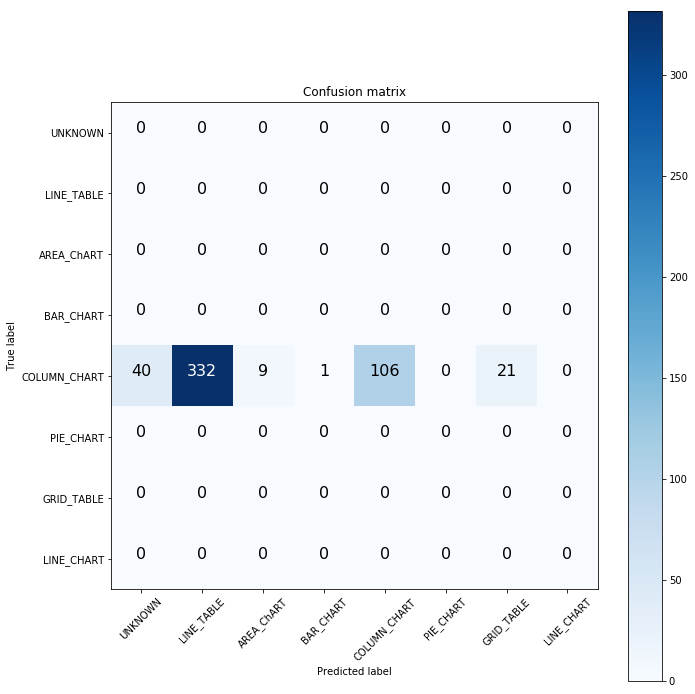

In [168]:
# LINE_CHART_COLUMN_CHART数据的混淆矩阵
cm = confusion_matrix(y_lcc_true, y_lcc_pred, labels=classes)
plot_confusion_matrix(cm, classes)